<img src="https://habrastorage.org/webt/ia/m9/zk/iam9zkyzqebnf_okxipihkgjwnw.jpeg" />
    
**<center>[mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course** </center><br>
Authors: [Yury Kashnitsky](https://yorko.github.io), and [Maxim Keremet](https://www.linkedin.com/in/maximkeremet/). Translated and edited by  [Artem Trunov](https://www.linkedin.com/in/datamove/), and [Aditya Soni](https://www.linkedin.com/in/aditya-soni-0505a9124/). [mlcourse.ai](https://mlcourse.ai) is powered by [OpenDataScience (ods.ai)](https://ods.ai/) © 2017—2022

# <center>Assignment #2. Task </center><a class="tocSkip">

## <center>Exploratory Data Analysis (EDA) of US flights with Pandas, Matplotlib, and Seaborn </center><a class="tocSkip">

<img src='https://habrastorage.org/webt/z9/io/wb/z9iowbwlya0sadrr0rf_am0ffm0.jpeg' width=50%>

Prior to working on the assignment, you'd better check out the corresponding course material:
 - [Exploratory data analysis with Pandas](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic01_pandas_data_analysis/topic1_pandas_data_analysis.ipynb?flush_cache=true), the same as an interactive web-based [Kaggle Notebook](https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas)
 - [Visualization: from Simple Distributions to Dimensionality Reduction](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_visual_data_analysis.ipynb?flush_cache=true), the same as a [Kaggle Notebook](https://www.kaggle.com/kashnitsky/topic-2-visual-data-analysis-in-python)
 - [Overview of Seaborn, Matplotlib and Plotly libraries](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_additional_seaborn_matplotlib_plotly.ipynb?flush_cache=true), the same as a [Kaggle Notebook](https://www.kaggle.com/kashnitsky/topic-2-part-2-seaborn-and-plotly) 
 - first lectures in [this](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX) YouTube playlist 
 - you can also practice with demo assignments, which are simpler and already shared with solutions: [A1 demo](https://www.kaggle.com/kashnitsky/a1-demo-pandas-and-uci-adult-dataset), [solution](https://www.kaggle.com/kashnitsky/a1-demo-pandas-and-uci-adult-dataset-solution), [A2 demo](https://www.kaggle.com/kashnitsky/a2-demo-analyzing-cardiovascular-data), [solution](https://www.kaggle.com/kashnitsky/a2-demo-analyzing-cardiovascular-data-solution)

### Your task is to:
 1. write code and perform computations in the cells below;
 2. choose answers in the [webform](https://docs.google.com/forms/d/1GXgR4TsqoTH_nQkrgluqWBElpK0emfhNzdZWZQObtnw).

*If you are sure that something is not 100% correct with the assignment/solution, please leave your feedback via the mentioned webform ↑*
    
-----

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd

# if seaborn is not yet installed, run `pip install seaborn` in terminal
import seaborn as sns

sns.set()
import matplotlib.pyplot as plt

# sharper plots
%config InlineBackend.figure_format = 'retina'
pd.set_option('display.max_rows', 30)

Consider the following terms we use:
* unique flight – a record (row) in the dataset
* completed flight – flight that is not cancelled (Cancelled==0 in the dataset)
* flight code – a combination of ['UniqueCarrier','FlightNum'], i.e.  UA52
* airport code – a three letter airport alias from 'Origin or 'Dest' columns

**Reading data into memory and creating a Pandas ``DataFrame`` object**

(This may take a while, be patient)

We are not going to read in the whole dataset. In order to reduce memory footprint, we instead load only needed columns and cast them to suitable data types.

In [2]:
dtypee = {
    "DayOfWeek": np.uint8,
    "DayofMonth": np.uint8,
    "Month": np.uint8,
    "Cancelled": np.uint8,
    "Year": np.uint16,
    "FlightNum": np.uint16,
    "Distance": np.uint16,
    "UniqueCarrier": str,
    "CancellationCode": str,
    "Origin": str,
    "Dest": str,
    "ArrDelay": np.float32,
    "DepDelay": np.float32,
    "CarrierDelay": np.float32,
    "WeatherDelay": np.float32,
    "NASDelay": np.float32,
    "SecurityDelay": np.float32,
    "LateAircraftDelay": np.float32,
    "DepTime": np.float32,
}

In [3]:
PATH_TO_DATA = Path("../../_static/data/assignment2")

In [4]:
flights_df = pd.read_csv(PATH_TO_DATA / "flights_2008.csv.bz2", usecols=dtypee.keys(), dtype=dtypee)
# change the path if needed

**Check the number of rows and columns and print column names.**

In [6]:
flights_df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Year,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008
Month,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
DayofMonth,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
DayOfWeek,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
DepTime,2003.0,754.0,628.0,926.0,1829.0,1940.0,1937.0,1039.0,617.0,1620.0,706.0,1644.0,1426.0,715.0,1702.0,1029.0,1452.0,754.0,1323.0,1416.0
UniqueCarrier,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920,378,509,535,11,810,100,1333,829,1016,1827,2272,675,1144,4,54
ArrDelay,-14.0,2.0,14.0,-6.0,34.0,11.0,57.0,-18.0,2.0,-16.0,1.0,80.0,1.0,10.0,-4.0,11.0,15.0,-15.0,16.0,37.0
DepDelay,8.0,19.0,8.0,-4.0,34.0,25.0,67.0,-1.0,2.0,0.0,6.0,94.0,-4.0,0.0,2.0,9.0,27.0,9.0,28.0,51.0
Origin,IAD,IAD,IND,IND,IND,IND,IND,IND,IND,IND,IND,IND,IND,IND,IND,IND,IND,IND,IND,ISP


In [7]:
print(flights_df.shape)
print(flights_df.columns)

(7009728, 19)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


**Print first 5 rows of the dataset.**

**Transpose the frame to see all features at once.**

**Examine data types of all features and total dataframe size in memory.**

In [8]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               uint16 
 1   Month              uint8  
 2   DayofMonth         uint8  
 3   DayOfWeek          uint8  
 4   DepTime            float32
 5   UniqueCarrier      object 
 6   FlightNum          uint16 
 7   ArrDelay           float32
 8   DepDelay           float32
 9   Origin             object 
 10  Dest               object 
 11  Distance           uint16 
 12  Cancelled          uint8  
 13  CancellationCode   object 
 14  CarrierDelay       float32
 15  WeatherDelay       float32
 16  NASDelay           float32
 17  SecurityDelay      float32
 18  LateAircraftDelay  float32
dtypes: float32(8), object(4), uint16(3), uint8(4)
memory usage: 494.7+ MB


**Get basic statistics of each feature.**

In [10]:
flights_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7009728.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,7009728.0,6.375130,3.406737,1.0,3.0,6.0,9.0,12.0
DayofMonth,7009728.0,15.728015,8.797068,1.0,8.0,16.0,23.0,31.0
DayOfWeek,7009728.0,3.924182,1.988259,1.0,2.0,4.0,6.0,7.0
DepTime,6873482.0,1333.830566,478.068909,1.0,928.0,1325.0,1728.0,2400.0
FlightNum,7009728.0,2224.200105,1961.715999,1.0,622.0,1571.0,3518.0,9743.0
ArrDelay,6855029.0,8.168451,38.501938,-519.0,-10.0,-2.0,12.0,2461.0
DepDelay,6873482.0,9.972576,35.311272,-534.0,-4.0,-1.0,8.0,2467.0
Distance,7009728.0,726.387029,562.101803,11.0,325.0,581.0,954.0,4962.0
Cancelled,7009728.0,0.019606,0.138643,0.0,0.0,0.0,0.0,1.0


Итого 16 столбцов  
Ниже вижу 3 столбца с буквенными данными 

**Count unique Carriers and plot their relative share of flights:**

In [64]:
flights_df.head(18).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Year,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008
Month,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
DayofMonth,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
DayOfWeek,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
DepTime,2003.0,754.0,628.0,926.0,1829.0,1940.0,1937.0,1039.0,617.0,1620.0,706.0,1644.0,1426.0,715.0,1702.0,1029.0,1452.0,754.0
UniqueCarrier,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920,378,509,535,11,810,100,1333,829,1016,1827,2272,675,1144
ArrDelay,-14.0,2.0,14.0,-6.0,34.0,11.0,57.0,-18.0,2.0,-16.0,1.0,80.0,1.0,10.0,-4.0,11.0,15.0,-15.0
DepDelay,8.0,19.0,8.0,-4.0,34.0,25.0,67.0,-1.0,2.0,0.0,6.0,94.0,-4.0,0.0,2.0,9.0,27.0,9.0
Origin,IAD,IAD,IND,IND,IND,IND,IND,IND,IND,IND,IND,IND,IND,IND,IND,IND,IND,IND


In [11]:
flights_df["UniqueCarrier"].nunique()

20

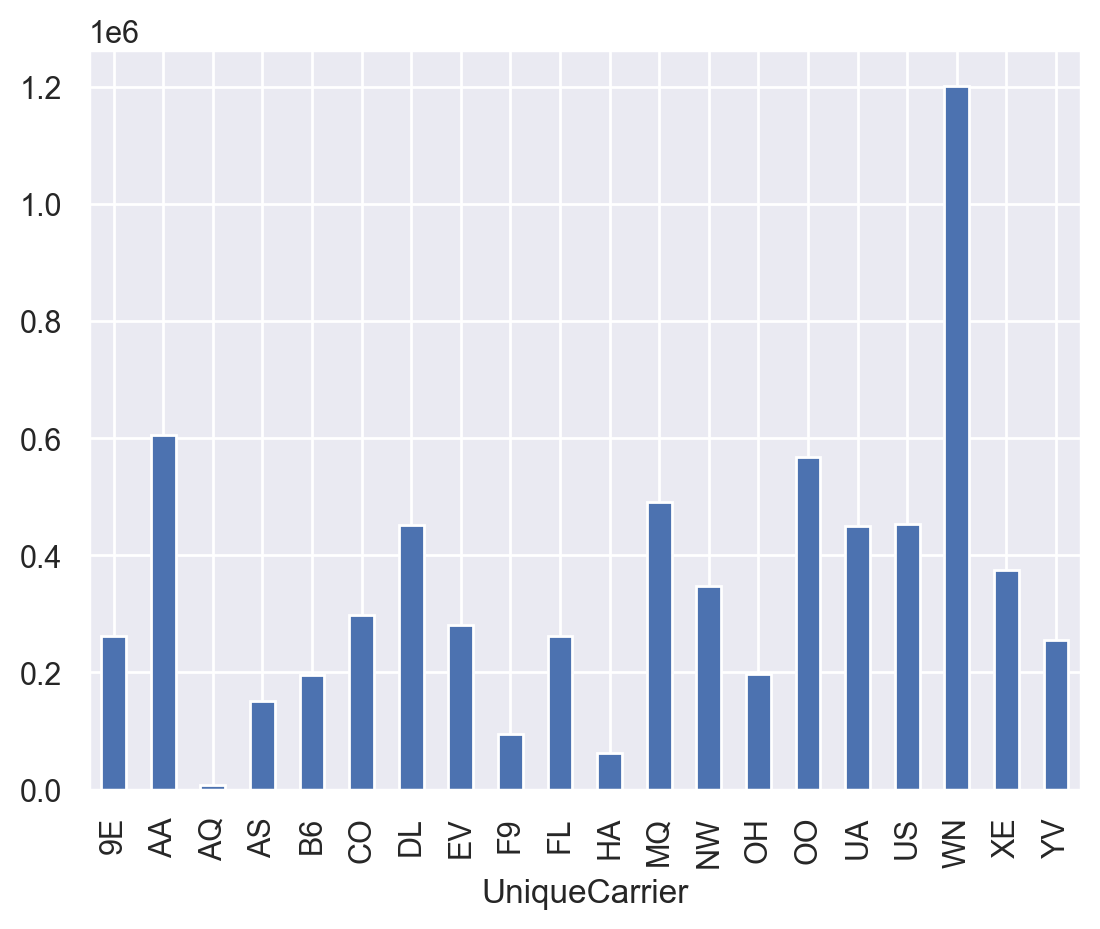

In [12]:
flights_df.groupby("UniqueCarrier").size().plot(kind="bar");

**We can also _group by_ category/categories in order to calculate different aggregated statistics.**

**For example, finding top-3 flight codes, that have the largest total distance traveled in year 2008.**

In [ ]:
pd.crosstab(flights_df.Distance, flights_df.FlightNum, aggfunc=sum, values=flights_df.Distance).head(3)

In [ ]:
flights_df.pivot_table(
        index="FlightNum", columns="Distance", aggfunc=sum
    )

In [103]:
flights_df.loc[flights_df.Year == 2008, 'Year':'LateAircraftDelay'].pivot_table(
        index="Distance", columns="FlightNum", aggfunc=sum
    ).head(3)

C:\Users\user\AppData\Local\Temp\ipykernel_37252\3306339387.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  flights_df.loc[flights_df.Year == 2008, 'Year':'LateAircraftDelay'].pivot_table(


ArrDelay                                               ... Year  \
FlightNum     1    2    3    4    5    6    7    8    9    10    ... 8910   
Distance                                                         ...        
11             NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
17             NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
21             NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   

                                                        
FlightNum 8911 8940 8941 9002 9202 9740 9741 9742 9743  
Distance                                                
11         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
17         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
21         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[3 rows x 128163 columns]

In [127]:
flights_df.groupby(['UniqueCarrier', 'FlightNum'])["Distance"].size().to_frame().sort_values(by='Distance', ascending=False).iloc[:3]

Distance
UniqueCarrier FlightNum          
AS            65             1820
              64             1815
              62             1739

In [135]:
flights_df.groupby(['UniqueCarrier', 'FlightNum'])["Distance"].sum().sort_values(ascending=False).iloc[:3]

UniqueCarrier  FlightNum
CO             15           1796244
               14           1796244
UA             52           1789722
Name: Distance, dtype: uint64

In [32]:
# ЮРИЙ
flights_df.groupby(["UniqueCarrier", "FlightNum"])["Distance"].sum().sort_values(
    ascending=False
).iloc[:3]

UniqueCarrier  FlightNum
CO             15           1796244
               14           1796244
UA             52           1789722
Name: Distance, dtype: uint64

**Another way:**

In [137]:
flights_df.groupby(["UniqueCarrier", "FlightNum"]).agg(
    {"Distance": [np.mean, np.sum, "count"], "Cancelled": np.sum}
).sort_values(("Distance", "sum"), ascending=False).iloc[0:3]

C:\Users\user\AppData\Local\Temp\ipykernel_37252\4053492820.py:1: FutureWarning: The provided callable <function mean at 0x00000153F0C499D0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  flights_df.groupby(["UniqueCarrier", "FlightNum"]).agg(
C:\Users\user\AppData\Local\Temp\ipykernel_37252\4053492820.py:1: FutureWarning: The provided callable <function sum at 0x00000153F0C43A60> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  flights_df.groupby(["UniqueCarrier", "FlightNum"]).agg(


Distance                Cancelled
                                mean      sum count       sum
UniqueCarrier FlightNum                                      
CO            15         4962.000000  1796244   362         0
              14         4962.000000  1796244   362         0
UA            52         2465.181818  1789722   726         8

**Number of flights by days of week and months:**

In [138]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,80807,97298,100080,102043,81940,67178,76419
2,81504,79700,80587,82158,102726,66462,76099
3,103210,81159,82307,82831,82936,86153,97494
4,82463,100785,102586,82799,82964,68304,78225
5,80626,79884,81264,102572,102878,84493,74576
6,104168,82160,82902,83617,83930,72322,99566
7,84095,103429,103315,105035,79349,72219,80489
8,82983,80895,81773,82625,103878,86155,93970
9,94300,91533,74057,75589,75881,58343,71205


**It can also be handy to color such tables in order to easily notice outliers:**

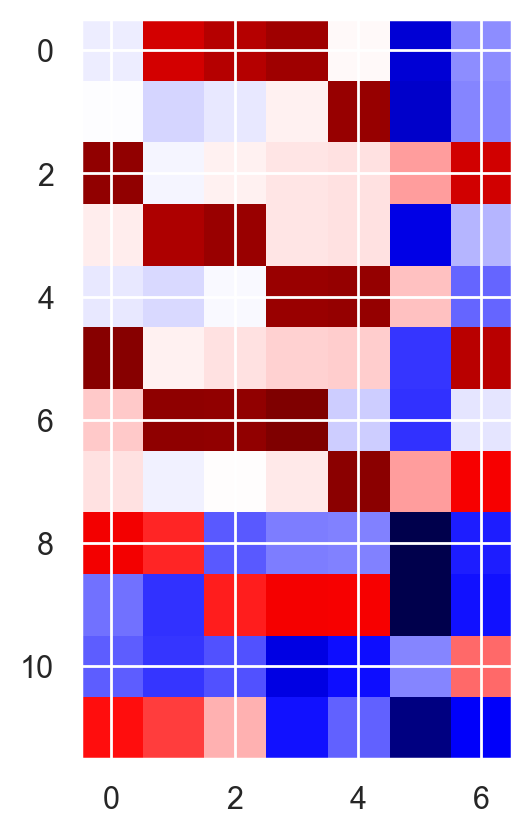

In [139]:
plt.imshow(
    pd.crosstab(flights_df.Month, flights_df.DayOfWeek),
    cmap="seismic",
    interpolation="none",
);

**Flight distance histogram:**

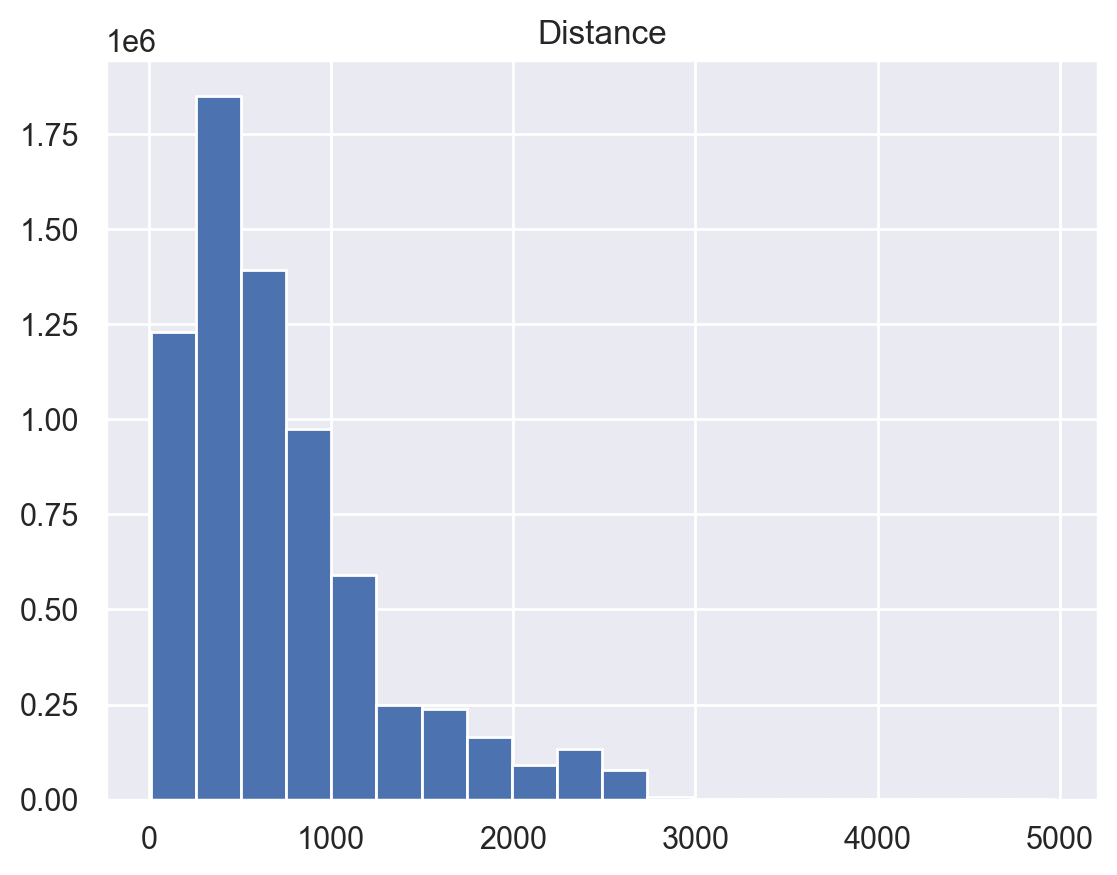

In [145]:
flights_df.hist("Distance", bins=20);

**Making a histogram of flight frequency by date.**

In [5]:
flights_df["Date"] = pd.to_datetime(
    flights_df.rename(columns={"DayofMonth": "Day"})[["Year", "Month", "Day"]]
)

In [9]:
flights_df.head(2).T

,0,1
Year,2008,2008
Month,1,1
DayofMonth,3,3
DayOfWeek,4,4
DepTime,2003.0,754.0
UniqueCarrier,WN,WN
FlightNum,335,3231
ArrDelay,-14.0,2.0
DepDelay,8.0,19.0
Origin,IAD,IAD


In [8]:
flights_df.T.head()

,0,1,2,3,4,5,6,7,8,9,...,7009718,7009719,7009720,7009721,7009722,7009723,7009724,7009725,7009726,7009727
Year,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,...,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008
Month,1,1,1,1,1,1,1,1,1,1,...,12,12,12,12,12,12,12,12,12,12
DayofMonth,3,3,3,3,3,3,3,3,3,3,...,13,13,13,13,13,13,13,13,13,13
DayOfWeek,4,4,4,4,4,4,4,4,4,4,...,6,6,6,6,6,6,6,6,6,6
DepTime,2003.0,754.0,628.0,926.0,1829.0,1940.0,1937.0,1039.0,617.0,1620.0,...,1007.0,638.0,756.0,612.0,749.0,1002.0,834.0,655.0,1251.0,1110.0


In [56]:
num_flights_by_date = flights_df.groupby("Date").size()
num_flights_by_date

Date
2008-01-01    19187
2008-01-02    20954
2008-01-03    20937
2008-01-04    20929
2008-01-05    18069
              ...  
2008-12-27    16593
2008-12-28    17696
2008-12-29    18540
2008-12-30    18538
2008-12-31    15748
Length: 366, dtype: int64

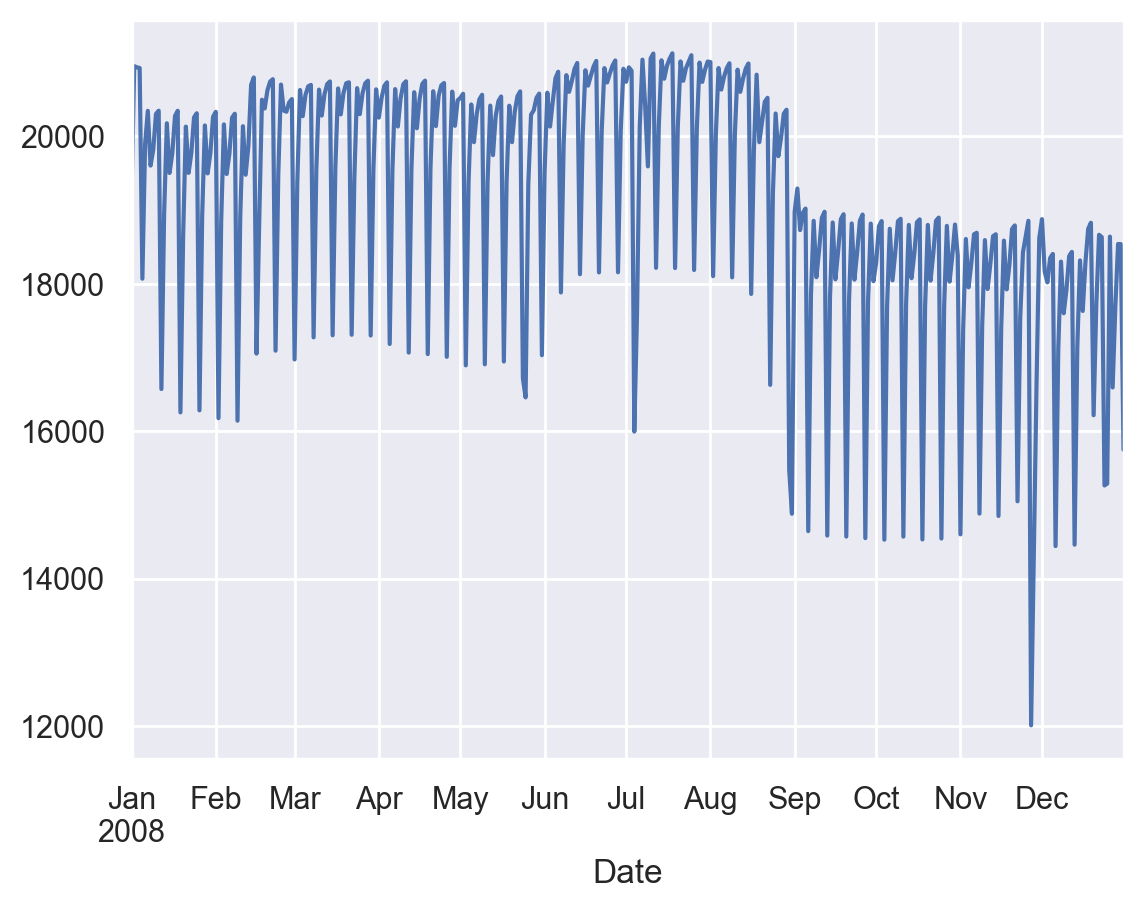

In [46]:
num_flights_by_date.plot();

**Do you see a weekly pattern above? And below?**

In [152]:
flights_df.head(2).T

,0,1
Year,2008,2008
Month,1,1
DayofMonth,3,3
DayOfWeek,4,4
DepTime,2003.0,754.0
UniqueCarrier,WN,WN
FlightNum,335,3231
ArrDelay,-14.0,2.0
DepDelay,8.0,19.0
Origin,IAD,IAD


**We'll need a new column in our dataset - departure hour, let's create it.**

As we see, `DepTime` is distributed from 1 to 2400 (it is given in the `hhmm` format, check the [column description](https://www.transtats.bts.gov/Fields.asp?Table_ID=236) again). We'll treat departure hour as `DepTime` // 100 (divide by 100 and apply the `floor` function). However, now we'll have both hour 0 and hour 24. Hour 24 sounds strange, we'll set it to be 0 instead (a typical imperfectness of real data, however, you can check that it affects only 521 rows, which is sort of not a big deal). So now values of a new column `DepHour` will be distributed from 0 to 23. There are some missing values, for now we won't fill in them, just ignore them. 

In [10]:
flights_df["DepTime"].head().T

0    2003.0
1     754.0
2     628.0
3     926.0
4    1829.0
Name: DepTime, dtype: float32

In [ ]:
flights_df["DepHour"] = flights_df["DepTime"] // 100
flights_df["DepHour"].replace(to_replace=24, value=0, inplace=True)

In [7]:
flights_df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Year,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008
Month,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
DayofMonth,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
DayOfWeek,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
DepTime,2003.0,754.0,628.0,926.0,1829.0,1940.0,1937.0,1039.0,617.0,1620.0,706.0,1644.0,1426.0,715.0,1702.0,1029.0,1452.0,754.0,1323.0,1416.0
UniqueCarrier,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920,378,509,535,11,810,100,1333,829,1016,1827,2272,675,1144,4,54
ArrDelay,-14.0,2.0,14.0,-6.0,34.0,11.0,57.0,-18.0,2.0,-16.0,1.0,80.0,1.0,10.0,-4.0,11.0,15.0,-15.0,16.0,37.0
DepDelay,8.0,19.0,8.0,-4.0,34.0,25.0,67.0,-1.0,2.0,0.0,6.0,94.0,-4.0,0.0,2.0,9.0,27.0,9.0,28.0,51.0
Origin,IAD,IAD,IND,IND,IND,IND,IND,IND,IND,IND,IND,IND,IND,IND,IND,IND,IND,IND,IND,ISP


In [18]:
flights_df["DepHour"].describe()

count    6.873482e+06
mean     1.303737e+01
std      4.789944e+00
min      0.000000e+00
25%      9.000000e+00
50%      1.300000e+01
75%      1.700000e+01
max      2.300000e+01
Name: DepHour, dtype: float64

count    6873482.0
mean           NaN
std            0.0
min            0.0
25%            9.0
50%           13.0
75%           17.0
max           23.0
Name: DepHour, dtype: float64

### Now it's your turn. Answer the questions below.

**<font color='red'>Question 1.</font> How dataset?**

- 10
- 15
- 20
- 25 

In [155]:
flights_df.UniqueCarrier.nunique()

20

**<font color='red'>Question 2.</font>  We have  difference?** <br>

- Cancelled overweights completed by 329 flights
- Completed overweights cancelled by 6734860 flights
- Cancelled overweights completed by 671 flights
- Completed overweights cancelled by 11088967 flights

In [16]:
flights_df.Cancelled.unique()

array([0, 1], dtype=uint8)

In [19]:
a, b = flights_df.Cancelled.value_counts()
a - b

6734860

In [21]:
flights_df.Cancelled.value_counts()

Cancelled
0    6872294
1     137434
Name: count, dtype: int64

**<font color='red'>Question 3.</font> Find a  code?**

- yes, ATL
- yes, HNL
- yes, MSP
- no

In [ ]:
FlightNum

DepDelay
ArrDelay

In [25]:
flights_df.DepDelay.max()

2467.0

In [14]:
flights_df[flights_df.DepDelay == flights_df.DepDelay.max()].head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepHour
2235378,2008,4,10,4,724.0,NW,1699,2453.0,2467.0,CLT,MSP,930,0,NaN,2436.0,0.0,0.0,0.0,17.0,7.0


In [33]:
flights_df[flights_df.ArrDelay == flights_df.ArrDelay.max()][['ArrDelay', 'FlightNum', 'Dest']].head()

,ArrDelay,FlightNum,Dest
1018798,2461.0,808,MSP


In [51]:
flights_df.groupby(['ArrDelay', 'DepDelay'])['Dest'].size().to_frame()

,,Dest
ArrDelay,DepDelay,
-519.0,-534.0,1
-129.0,-10.0,1
-109.0,19.0,1
-92.0,0.0,1
-91.0,0.0,1
...,...,...
1655.0,1597.0,1
1707.0,1710.0,1
1951.0,1952.0,1


In [34]:
flights_df[flights_df.DepDelay == flights_df.DepDelay.max()][['DepDelay', 'FlightNum', 'Dest']].head()

,DepDelay,FlightNum,Dest
2235378,2467.0,1699,MSP


**<font color='red'>Question 4.</font> Find the flights.**

- AA
- MQ
- WN
- CO 

In [181]:
flights_df[flights_df.Cancelled == flights_df.Cancelled.max()].groupby('UniqueCarrier').size().sort_values(ascending=False)

UniqueCarrier
MQ    18331
AA    17440
OO    12436
WN    12389
UA    10541
XE     9992
YV     9219
9E     7100
DL     6813
US     6582
OH     6462
EV     5026
CO     3702
B6     3205
NW     2906
FL     2236
AS     2139
HA      570
F9      303
AQ       42
dtype: int64

In [62]:
flights_df.groupby('UniqueCarrier').size().sort_values(ascending=False)

UniqueCarrier
WN    1201754
AA     604885
OO     567159
MQ     490693
US     453589
DL     451931
UA     449515
XE     374510
NW     347652
CO     298455
EV     280575
9E     262208
FL     261684
YV     254930
OH     197607
B6     196091
AS     151102
F9      95762
HA      61826
AQ       7800
dtype: int64

**<font color='red'>Question 5.</font> Let's examine flights?**<br>

*Hint:* Check time format [here](https://www.transtats.bts.gov/Fields.asp?Table_ID=236).

- 1 am 
- 5 am  
- 8 am
- 3 pm 

In [69]:
flights_df.DepHour.value_counts().sort_values()

DepHour
3.0        833
2.0       1851
4.0       3390
1.0       5861
0.0      20368
23.0     46103
22.0    119651
5.0     148167
21.0    254850
20.0    285991
19.0    387288
18.0    400784
15.0    411126
14.0    416875
12.0    424249
10.0    431460
17.0    432488
16.0    434017
9.0     434850
13.0    435917
7.0     436700
11.0    444702
6.0     446737
8.0     449224
Name: count, dtype: int64

**<font color='red'>Question 6.</font> OK, now  cancelled flights?**<br>

- 2 am 
- 9 pm  
- 8 am  
- 3 am

In [77]:
flights_df.Cancelled.unique()

array([0, 1], dtype=uint8)

In [287]:
flights_df.DepHour.nunique()

24

In [114]:
# ЮРИЙ
flights_df.groupby('DepHour')['Cancelled'].mean().sort_values().head()

DepHour
3.0     0.000000
13.0    0.000108
12.0    0.000125
9.0     0.000129
10.0    0.000132
Name: Cancelled, dtype: float64

**<font color='red'>Question 7.</font>  Is there  apply.**

- 3
- 19
- 22
- 4 

In [122]:
flights_df[flights_df.Cancelled == 0].DepHour.value_counts().sort_index().head()

DepHour
0.0    20361
1.0     5857
2.0     1850
3.0      833
4.0     3389
Name: count, dtype: int64

**<font color='red'>Question 8.</font> Find the  maximum.**<br>

*Hint:* Consider only *completed* flights.

- 4
- 7
- 8
- 17 

In [ ]:
# ЮРИЙ
flights_df[(flights_df["Cancelled"] == 0)].groupby(["DepHour"]).size().idxmax()

In [117]:
flights_df.DepHour.value_counts().sort_values(ascending=False).head(2)

DepHour
8.0    449224
6.0    446737
Name: count, dtype: int64

In [118]:
flights_df[flights_df['Cancelled'] == 0].DepHour.value_counts().sort_values(ascending=False).head(2)

DepHour
8.0    449145
6.0    446657
Name: count, dtype: int64

**<font color='red'>Question 9.</font> Since  happen?**<br>

*Hint:* Consider only *completed* flights.

- no, there are no such cases
- yes, at 5-6 am 
- yes, at 9-10 am
- yes, at 2-4 pm

In [180]:
# ЮРИЙ 
flights_df.groupby(["DepHour"])['DepDelay'].mean().head(10)

DepHour
0.0     70.784470
1.0    111.969627
2.0    122.731499
3.0     95.819931
4.0      3.370502
5.0     -4.255138
6.0     -1.628840
7.0      0.103682
8.0      1.762197
9.0      3.754863
Name: DepDelay, dtype: float32

In [167]:
flights_df.groupby('DepHour')['Cancelled'].mean().sort_values().head(2)

DepHour
3.0     0.000000
13.0    0.000108
Name: Cancelled, dtype: float64

In [162]:
flights_df[flights_df.DepDelay < 0].head(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,...,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date,DepHour
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,...,515,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03,9.0
7,2008,1,3,4,1039.0,WN,535,-18.0,-1.0,IND,...,1591,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03,10.0


In [175]:
flights_df[flights_df.DepDelay < 0].groupby('DepHour').value_counts()

Series([], Name: count, dtype: int64)

In [158]:
flights_df[flights_df.DepDelay < 0][['DepDelay', 'DepHour']].groupby('DepHour').size().sort_values(ascending=False).head(2)

DepHour
6.0    316577
7.0    296283
dtype: int64

In [152]:
flights_df[flights_df.DepDelay < 0]['DepHour'].value_counts().sort_values(ascending=False).head(2)

DepHour
6.0    316577
7.0    296283
Name: count, dtype: int64

In [177]:
flights_df.loc[flights_df.DepDelay < 0, ['DepDelay', 'DepHour']].groupby('DepHour').mean().sort_values(by="DepHour").head(2)

,DepDelay
DepHour,
0.0,-5.473437
1.0,-7.021798


In [127]:
flights_df.groupby(['DepDelay'])['DepHour'].size().to_frame().head(20)

,DepHour
DepDelay,
-534.0,1
-92.0,1
-79.0,1
-71.0,1
-70.0,3
-67.0,1
-65.0,1
-64.0,2
-63.0,1


**<font color='red'>Question 10.</font>  Considering depart?**<br>

- at noon
- at 7 am 
- at 8 am
- at 10 am

In [194]:
flights_df[flights_df['UniqueCarrier'] == 'MQ']['DepHour'].value_counts().head(2)

DepHour
10.0    33073
9.0     32609
Name: count, dtype: int64

**<font color='red'>Question 11.</font> Find  list?**
- DL
- AA
- OO
- EV

In [204]:
flights_df[flights_df.Cancelled == 0].groupby('UniqueCarrier').size().to_frame().sort_values(by=0, ascending=False).iloc[:10]

,0
UniqueCarrier,
WN,1189365
AA,587445
OO,554723
MQ,472362
US,447007
DL,445118
UA,438974
XE,364518
NW,344746


In [208]:
set(flights_df[flights_df.Cancelled == 0]['UniqueCarrier'].value_counts().iloc[:10])

{294753,
 344746,
 364518,
 438974,
 445118,
 447007,
 472362,
 554723,
 587445,
 1189365}

In [255]:
set(['DL', 'AA', 'OO', 'EV']).difference(set(flights_df[flights_df.Cancelled == 0]['UniqueCarrier'].value_counts().iloc[:10].index))

{'EV'}

In [261]:
flights_df.head(5).T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,2003.0,754.0,628.0,926.0,1829.0
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920
ArrDelay,-14.0,2.0,14.0,-6.0,34.0
DepDelay,8.0,19.0,8.0,-4.0,34.0
Origin,IAD,IAD,IND,IND,IND


**<font color='red'>Question 12.</font>  Plot distributions **  

Let be  
- Carrier - A  
- Weather conditions - B  
- National Air System - C  
- Security reasons - D  


*Reminder on Cancellatoin codes:*
```
A - Carrier 
B - Weather 
C - National Air System 
D - Security
```

In [260]:
flights_df[flights_df.CancellationCode.notna()]['CancellationCode'].unique()

array(['A', 'C', 'B', 'D'], dtype=object)

<Axes: xlabel='count', ylabel='CancellationCode'>

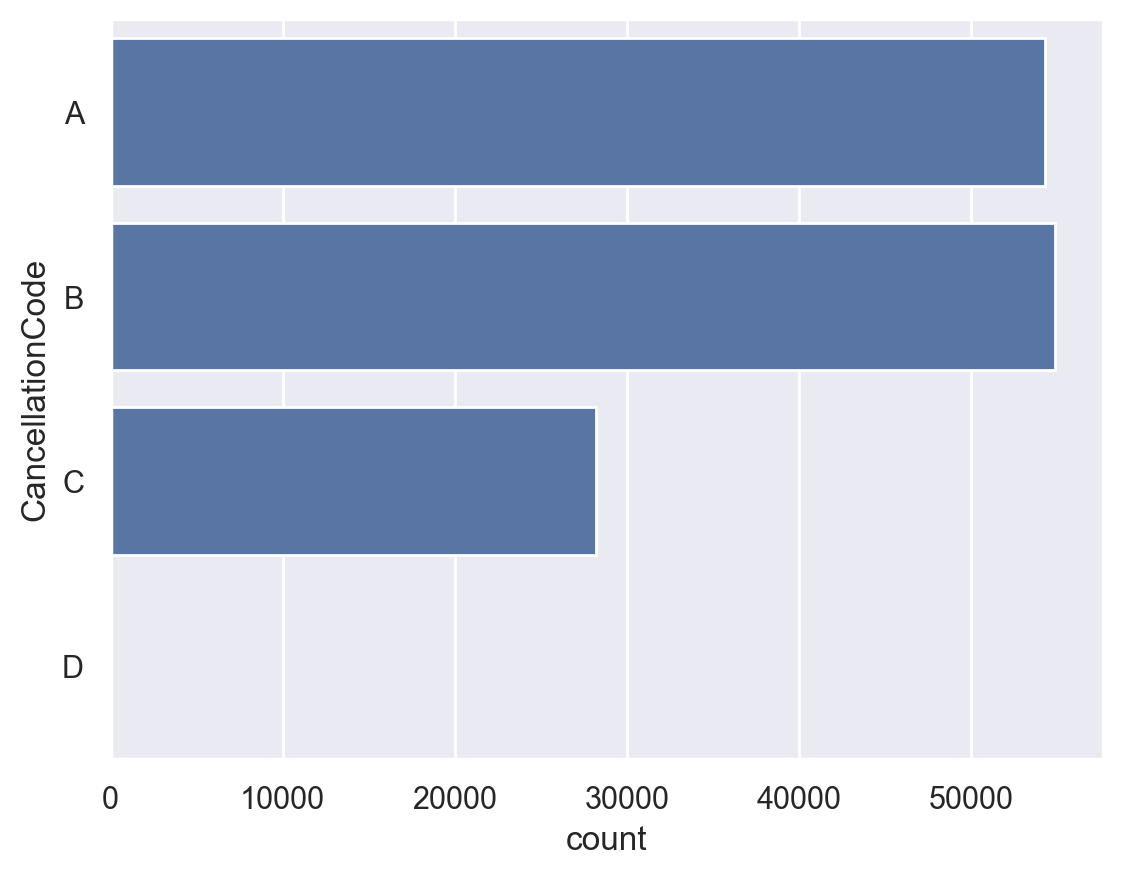

In [286]:
#  ЮРИЙ 
sns.countplot(flights_df['CancellationCode'].sort_values())

**<font color='red'>Question 13.</font> Which route flights?**

(Take a look at _'Origin'_ and _'Dest'_ features. Consider _A->B_ and _B->A_ directions as _different_ routes) 

 - New-York – Washington (JFK-IAD)
 - San-Francisco – Los-Angeles (SFO-LAX)
 - San-Jose – Dallas (SJC-DFW)
 - New-York – San-Francisco (JFK-SFO)

In [344]:
flights_df.head(2).T

,0,1
Year,2008,2008
Month,1,1
DayofMonth,3,3
DayOfWeek,4,4
DepTime,2003.0,754.0
UniqueCarrier,WN,WN
FlightNum,335,3231
ArrDelay,-14.0,2.0
DepDelay,8.0,19.0
Origin,IAD,IAD


In [8]:
# ЮРИЙ
flights_df["Route"] = flights_df['Origin'] + '->' + flights_df['Dest']

In [9]:
flights_df.groupby(['Route']).size().sort_values()

Route
DEN->CYS        1
SJC->FAT        1
LIT->MCO        1
DEN->PIH        1
SJC->SFO        1
            ...  
BOS->LGA    12029
LGA->BOS    12035
OGG->HNL    12383
LAX->SFO    13390
SFO->LAX    13788
Length: 5366, dtype: int64

In [296]:
flights_df.groupby(["Origin", "Dest"]).size().sort_values()

Origin  Dest
DEN     CYS         1
SJC     FAT         1
LIT     MCO         1
DEN     PIH         1
SJC     SFO         1
                ...  
BOS     LGA     12029
LGA     BOS     12035
OGG     HNL     12383
LAX     SFO     13390
SFO     LAX     13788
Length: 5366, dtype: int64

In [10]:
flights_df[["Origin", "Dest"]].groupby(["Origin", "Dest"]).size().idxmax()

('SFO', 'LAX')

**<font color='red'>Question 14.</font> Find top-5 to a delay.**

_Hint_: consider only positive delays

- 449 
- 539 
- 549 
- 668

In [19]:
top_5_del = flights_df[flights_df['DepDelay'] > 0].groupby(['Route']).size().sort_values(ascending=False).head()
top_5_del

Route
LAX->SFO    6253
DAL->HOU    5742
SFO->LAX    5322
ORD->LGA    5311
HOU->DAL    5288
dtype: int64

In [20]:
flights_top_5_del = flights_df[flights_df.Route.isin(top_5_del.index)]
flights_top_5_del

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,...,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date,DepHour,Route
398,2008,1,3,4,708.0,WN,457,-6.0,-2.0,LAX,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03,7.0,LAX->SFO
399,2008,1,3,4,NaN,WN,469,NaN,NaN,LAX,...,1,A,NaN,NaN,NaN,NaN,NaN,2008-01-03,NaN,LAX->SFO
400,2008,1,3,4,2321.0,WN,593,203.0,206.0,LAX,...,0,NaN,0.0,0.0,203.0,0.0,0.0,2008-01-03,23.0,LAX->SFO
401,2008,1,3,4,NaN,WN,618,NaN,NaN,LAX,...,1,C,NaN,NaN,NaN,NaN,NaN,2008-01-03,NaN,LAX->SFO
402,2008,1,3,4,2008.0,WN,646,129.0,123.0,LAX,...,0,NaN,0.0,24.0,6.0,0.0,99.0,2008-01-03,20.0,LAX->SFO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6953822,2008,12,29,1,2043.0,AS,253,-5.0,8.0,LAX,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-12-29,20.0,LAX->SFO
6953911,2008,12,30,2,820.0,AS,720,8.0,0.0,SFO,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-12-30,8.0,SFO->LAX
6954044,2008,12,30,2,2031.0,AS,721,-5.0,-4.0,LAX,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-12-30,20.0,LAX->SFO
6954228,2008,12,31,3,2037.0,AS,253,-7.0,2.0,LAX,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-12-31,20.0,LAX->SFO


In [25]:
(flights_top_5_del['WeatherDelay'] > 0).sum()

668

<font color='red'>**COUNT ALL FLIGHTS WITH WEATHER CONDITIONS CONTRIBUTING TO A DELAY**</font>

In [31]:
top_5_delays =flights_df[flights_df['DepDelay'] > 0].groupby(['Origin', 'Dest'])[['WeatherDelay', 'DepDelay']].count().sort_values(by='DepDelay', ascending=False).iloc[:5]
print(top_5_delays.index.levels)

[['ABE', 'ABI', 'ABQ', 'ABY', 'ACK', 'ACT', 'ACV', 'ACY', 'ADK', 'ADQ', 'AEX', 'AGS', 'AKN', 'ALB', 'ALO', 'AMA', 'ANC', 'ASE', 'ATL', 'ATW', 'AUS', 'AVL', 'AVP', 'AZO', 'BDL', 'BET', 'BFL', 'BGM', 'BGR', 'BHM', 'BIL', 'BIS', 'BJI', 'BLI', 'BMI', 'BNA', 'BOI', 'BOS', 'BPT', 'BQK', 'BQN', 'BRO', 'BRW', 'BTM', 'BTR', 'BTV', 'BUF', 'BUR', 'BWI', 'BZN', 'CAE', 'CAK', 'CDC', 'CDV', 'CEC', 'CHA', 'CHO', 'CHS', 'CIC', 'CID', 'CLD', 'CLE', 'CLL', 'CLT', 'CMH', 'CMI', 'CMX', 'COD', 'COS', 'CPR', 'CRP', 'CRW', 'CSG', 'CVG', 'CWA', 'DAB', 'DAL', 'DAY', 'DBQ', 'DCA', 'DEN', 'DFW', 'DHN', 'DLG', 'DLH', 'DRO', 'DSM', 'DTW', 'EGE', 'EKO', 'ELM', 'ELP', 'ERI', 'EUG', 'EVV', 'EWN', 'EWR', 'EYW', 'FAI', 'FAR', ...], ['ABE', 'ABI', 'ABQ', 'ABY', 'ACK', 'ACT', 'ACV', 'ACY', 'ADK', 'ADQ', 'AEX', 'AGS', 'AKN', 'ALB', 'ALO', 'AMA', 'ANC', 'ASE', 'ATL', 'ATW', 'AUS', 'AVL', 'AVP', 'AZO', 'BDL', 'BET', 'BFL', 'BGM', 'BGR', 'BHM', 'BIL', 'BIS', 'BJI', 'BLI', 'BMI', 'BNA', 'BOI', 'BOS', 'BPT', 'BQK', 'BQN', 'BRO

In [ ]:
# flights_df[flights_df.Origin == top_5_delays.iloc[:, 0]]["WeatherDelay"].sum()

In [39]:
flights_df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Year,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008
Month,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
DayofMonth,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
DayOfWeek,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
DepTime,2003.0,754.0,628.0,926.0,1829.0,1940.0,1937.0,1039.0,617.0,1620.0,706.0,1644.0,1426.0,715.0,1702.0,1029.0,1452.0,754.0,1323.0,1416.0
UniqueCarrier,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920,378,509,535,11,810,100,1333,829,1016,1827,2272,675,1144,4,54
ArrDelay,-14.0,2.0,14.0,-6.0,34.0,11.0,57.0,-18.0,2.0,-16.0,1.0,80.0,1.0,10.0,-4.0,11.0,15.0,-15.0,16.0,37.0
DepDelay,8.0,19.0,8.0,-4.0,34.0,25.0,67.0,-1.0,2.0,0.0,6.0,94.0,-4.0,0.0,2.0,9.0,27.0,9.0,28.0,51.0
Origin,IAD,IAD,IND,IND,IND,IND,IND,IND,IND,IND,IND,IND,IND,IND,IND,IND,IND,IND,IND,ISP


**<font color='red'>Question 15.</font> Examine statements:**

 - Flights are normally distributed within time interval [0-23] (Search for: Normal distribution, bell curve).
 - Flights are uniformly distributed within time interval [0-23].
 - In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.

In [ ]:
copy = flights_df
copy.info()

In [40]:
from scipy.stats import norm

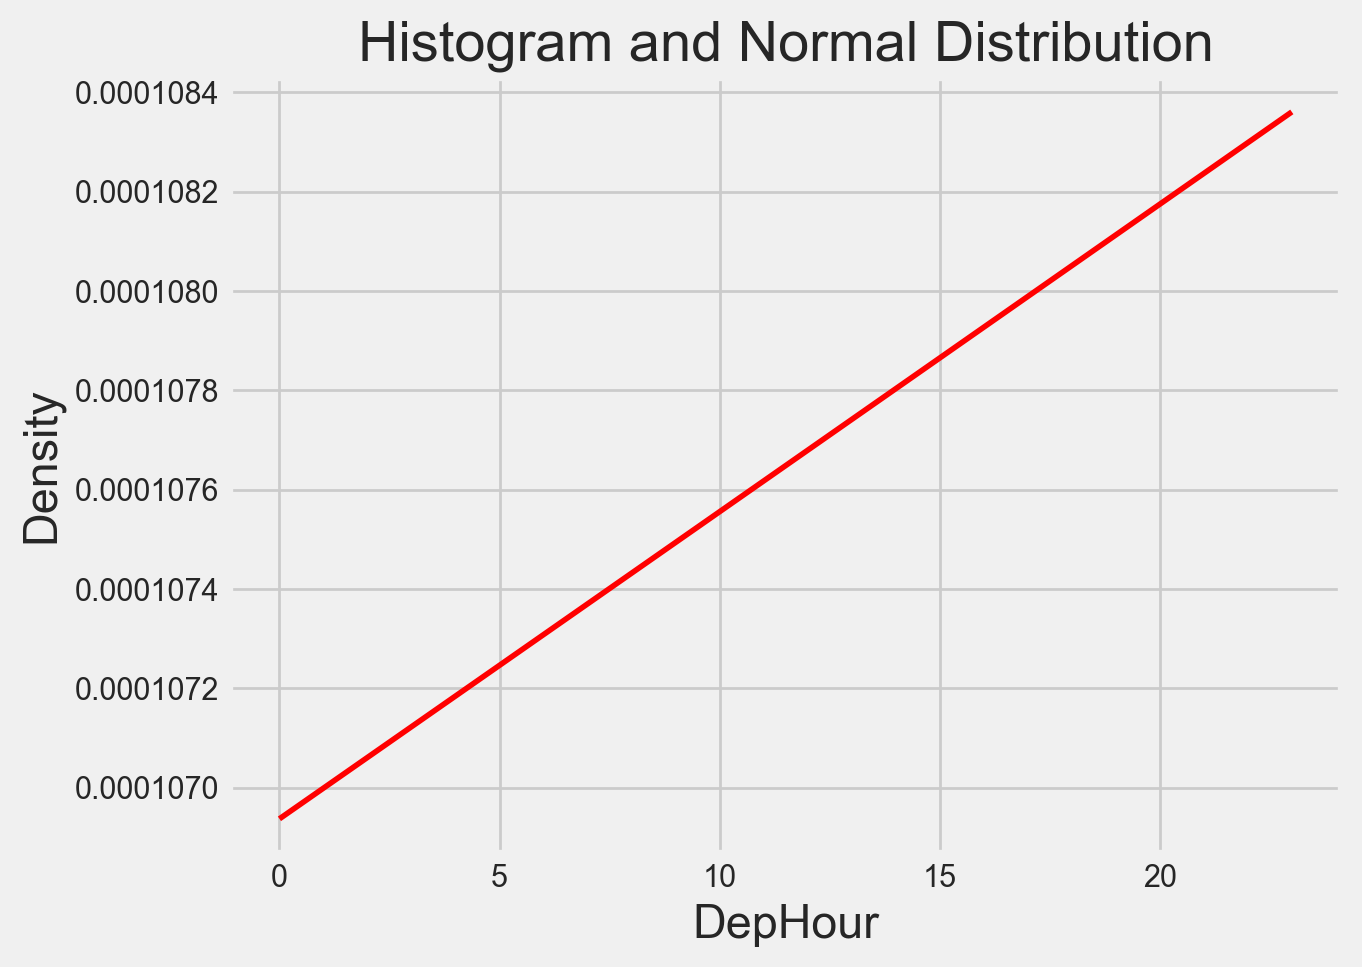

In [44]:
mean = flights_df.FlightNum.mean()
std = flights_df.FlightNum.std()

x = np.linspace(flights_df['DepHour'].min(), flights_df['DepHour'].max(), 100)
plt.plot(x, norm.pdf(x, mean, std), color='red', linewidth=2)

plt.xlabel('DepHour')
plt.ylabel('Density')
plt.title('Histogram and Normal Distribution')
plt.style.use('fivethirtyeight')
plt.show()

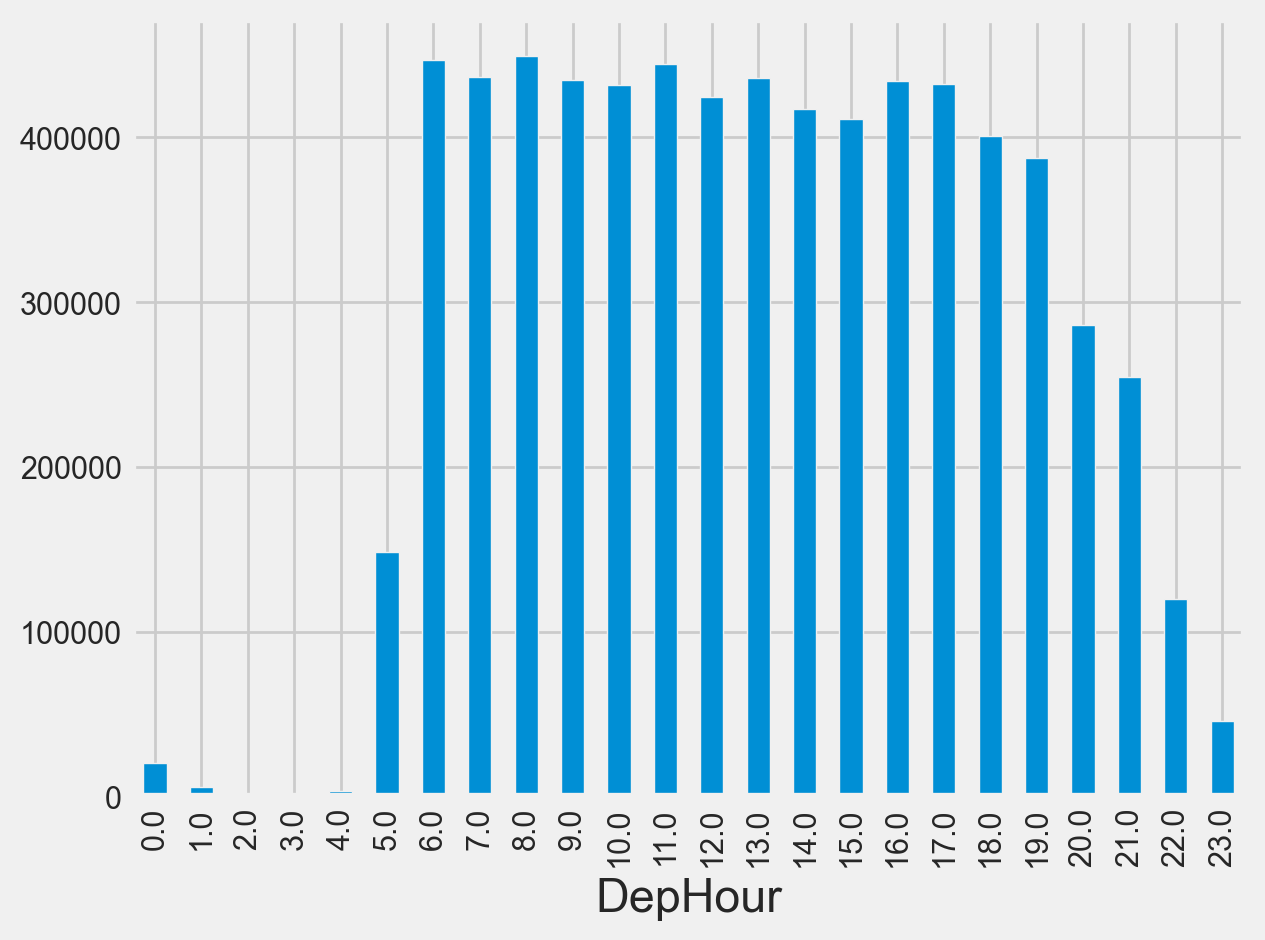

In [46]:
flights_df.groupby("DepHour").size().plot(kind="bar");

In [49]:
flights_df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Year,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008
Month,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
DayofMonth,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
DayOfWeek,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
DepTime,2003.0,754.0,628.0,926.0,1829.0,1940.0,1937.0,1039.0,617.0,1620.0,706.0,1644.0,1426.0,715.0,1702.0,1029.0,1452.0,754.0,1323.0,1416.0
UniqueCarrier,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920,378,509,535,11,810,100,1333,829,1016,1827,2272,675,1144,4,54
ArrDelay,-14.0,2.0,14.0,-6.0,34.0,11.0,57.0,-18.0,2.0,-16.0,1.0,80.0,1.0,10.0,-4.0,11.0,15.0,-15.0,16.0,37.0
DepDelay,8.0,19.0,8.0,-4.0,34.0,25.0,67.0,-1.0,2.0,0.0,6.0,94.0,-4.0,0.0,2.0,9.0,27.0,9.0,28.0,51.0
Origin,IAD,IAD,IND,IND,IND,IND,IND,IND,IND,IND,IND,IND,IND,IND,IND,IND,IND,IND,IND,ISP


**<font color='red'>Question 16.</font> Show indings.**

**Choose all correct statements:**
- The number of flights during weekends is less than during weekdays (working days). 
- The lowest number of flights is on Sunday.
- There are less flights during winter than during summer.

_Hint_: Look for official meteorological winter months for the Northern Hemisphere.  
Means winter begins on the winter solstice (around December 21).  
Soo, winter are January, Feb, March



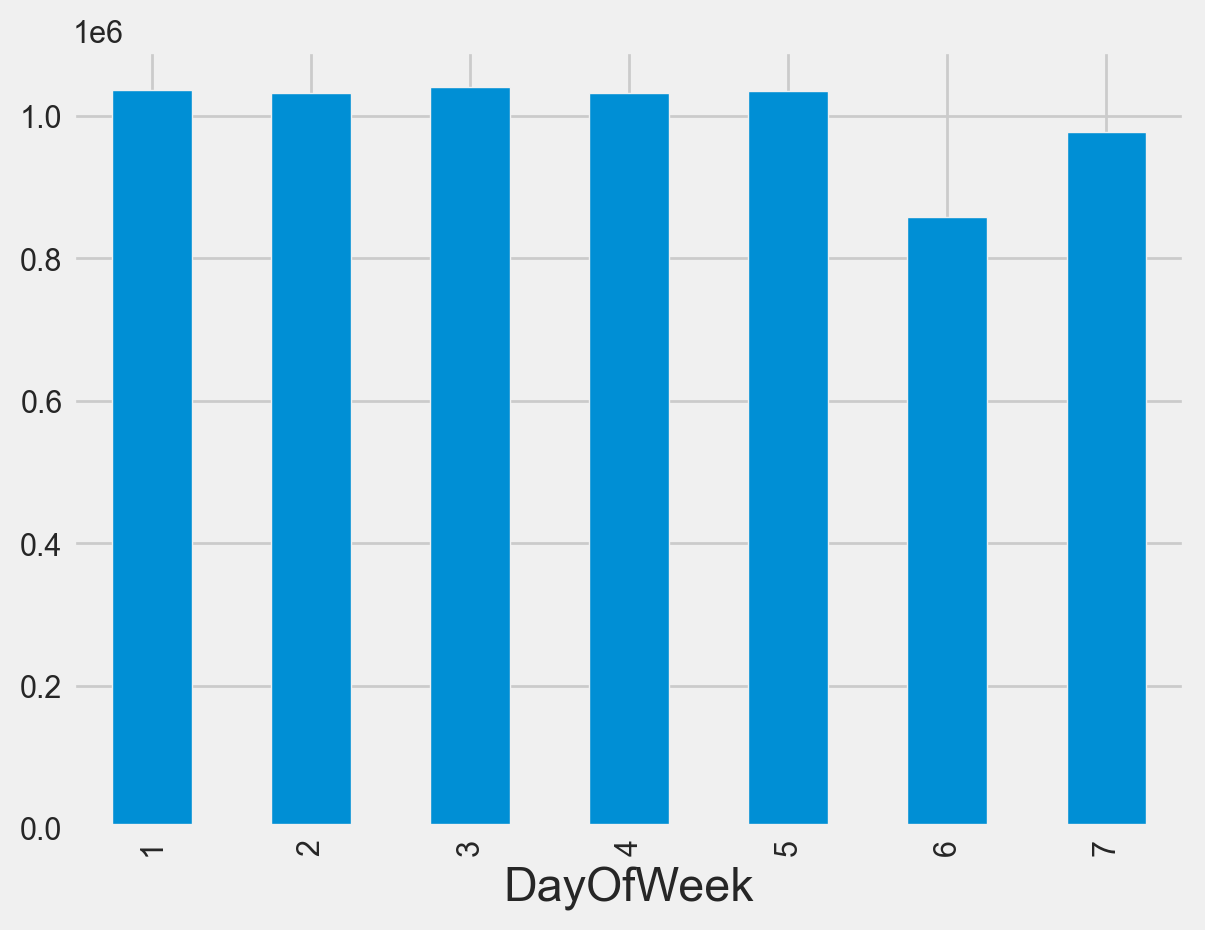

In [63]:
flights_df.groupby("DayOfWeek").size().plot(kind="bar");

In [59]:
num_flights_by_weekday = flights_df.groupby(['DayOfWeek']).size()
num_flights_by_weekday

DayOfWeek
1    1036201
2    1032049
3    1039665
4    1032224
5    1035166
6     857536
7     976887
dtype: int64

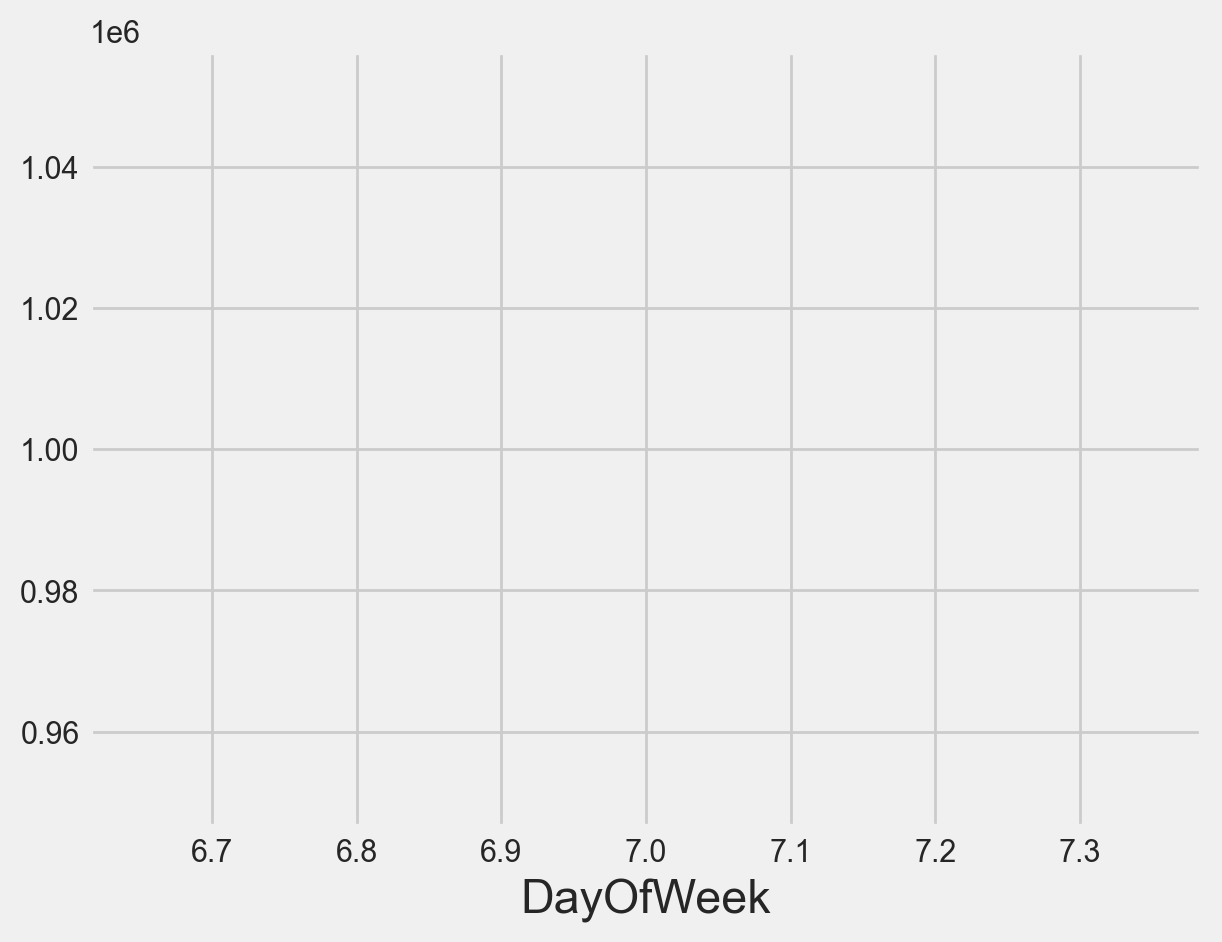

In [62]:
num_flights_by_weekday.rolling(window=7).mean().plot();

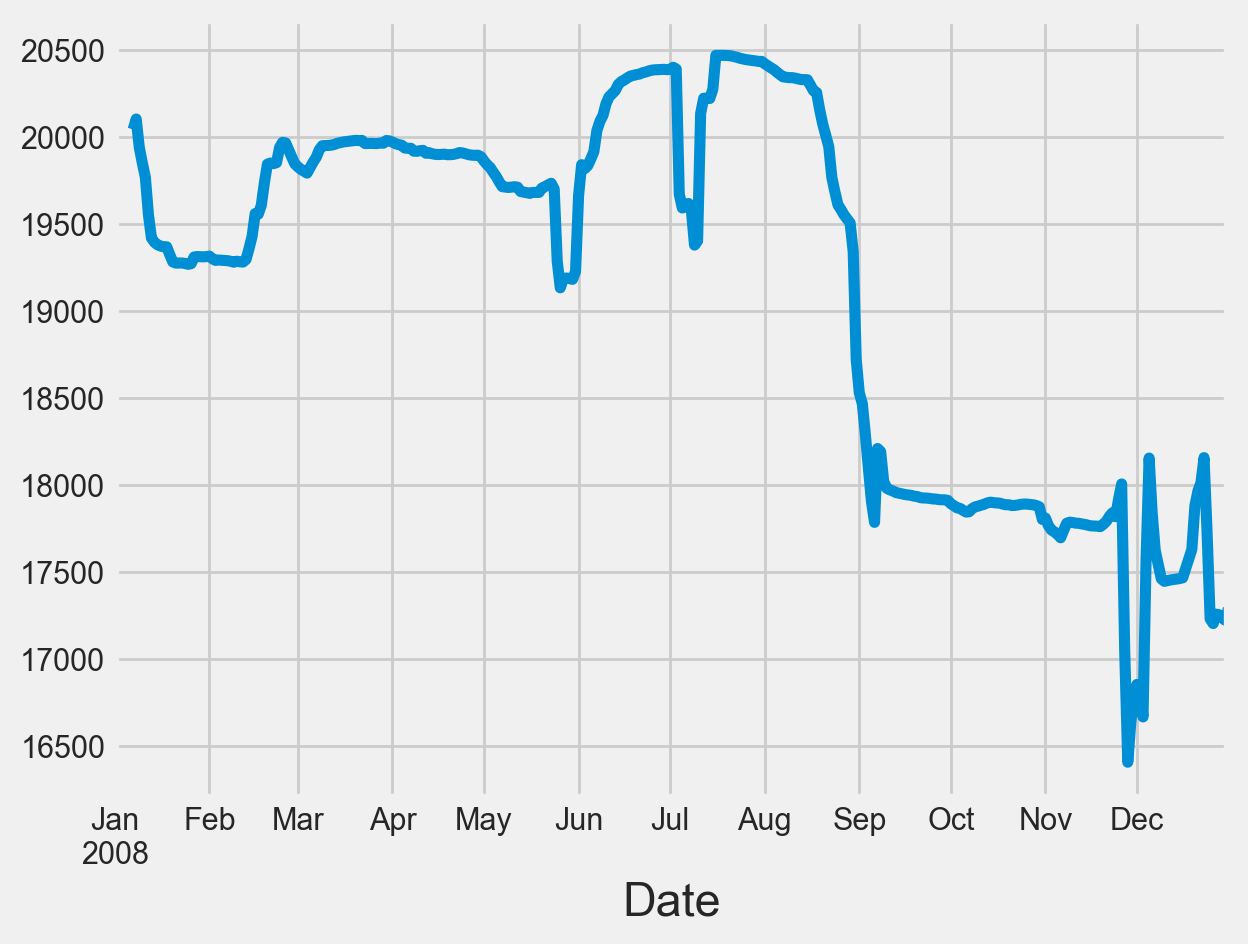

In [57]:
num_flights_by_date.rolling(window=7).mean().plot();

**<font color='red'>Question 17.</font> Examine months.**

**Choose all correct statements:**
- October has the lowest number of cancellations due to weather. 
- The highest number of cancellations in September is due to Security reasons.
- April's top cancellation reason is carriers. 
- Flights cancellations due to National Air System are more frequent than those due to carriers.

<Axes: xlabel='Month'>

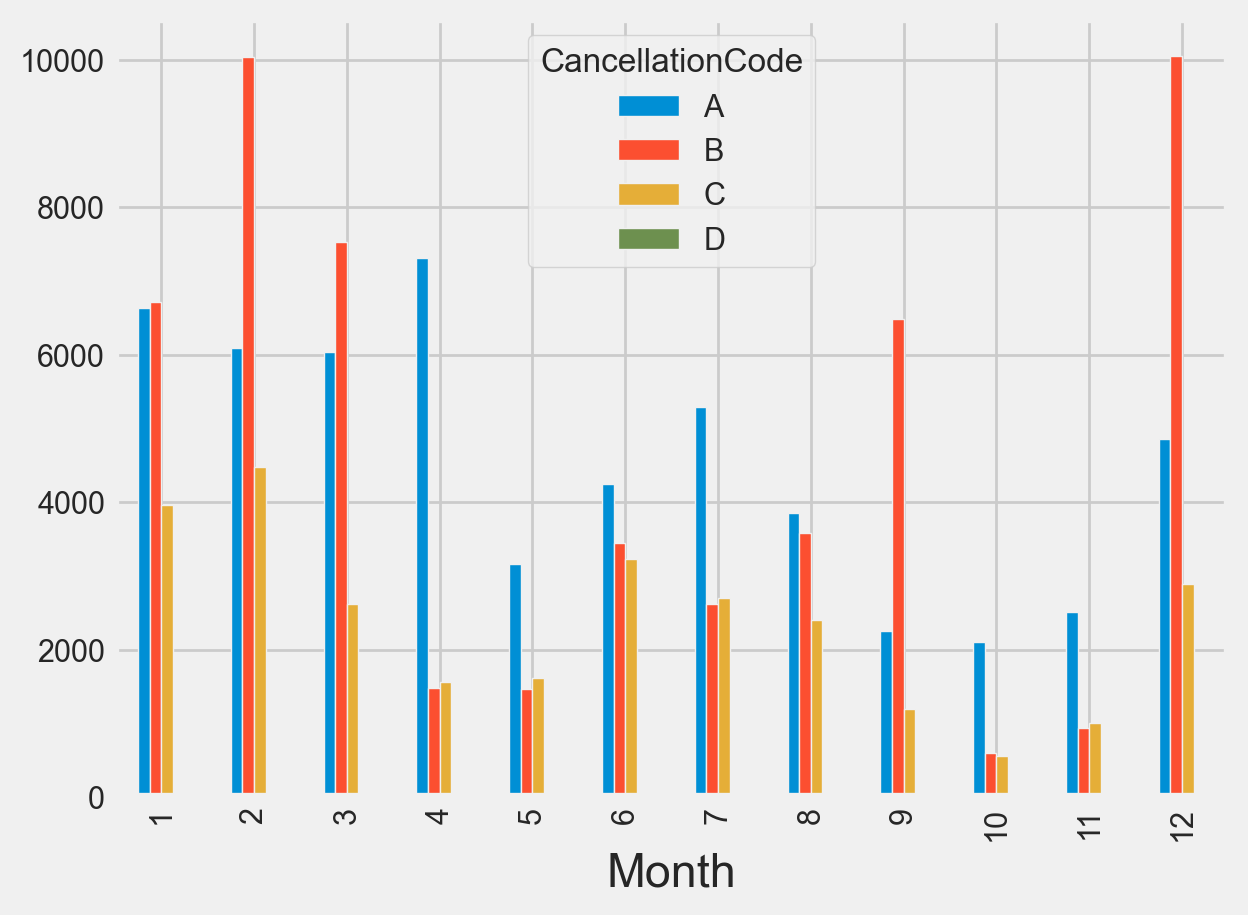

In [128]:
flights_df.groupby(["Month", "CancellationCode"]).size().unstack().plot(kind="bar")

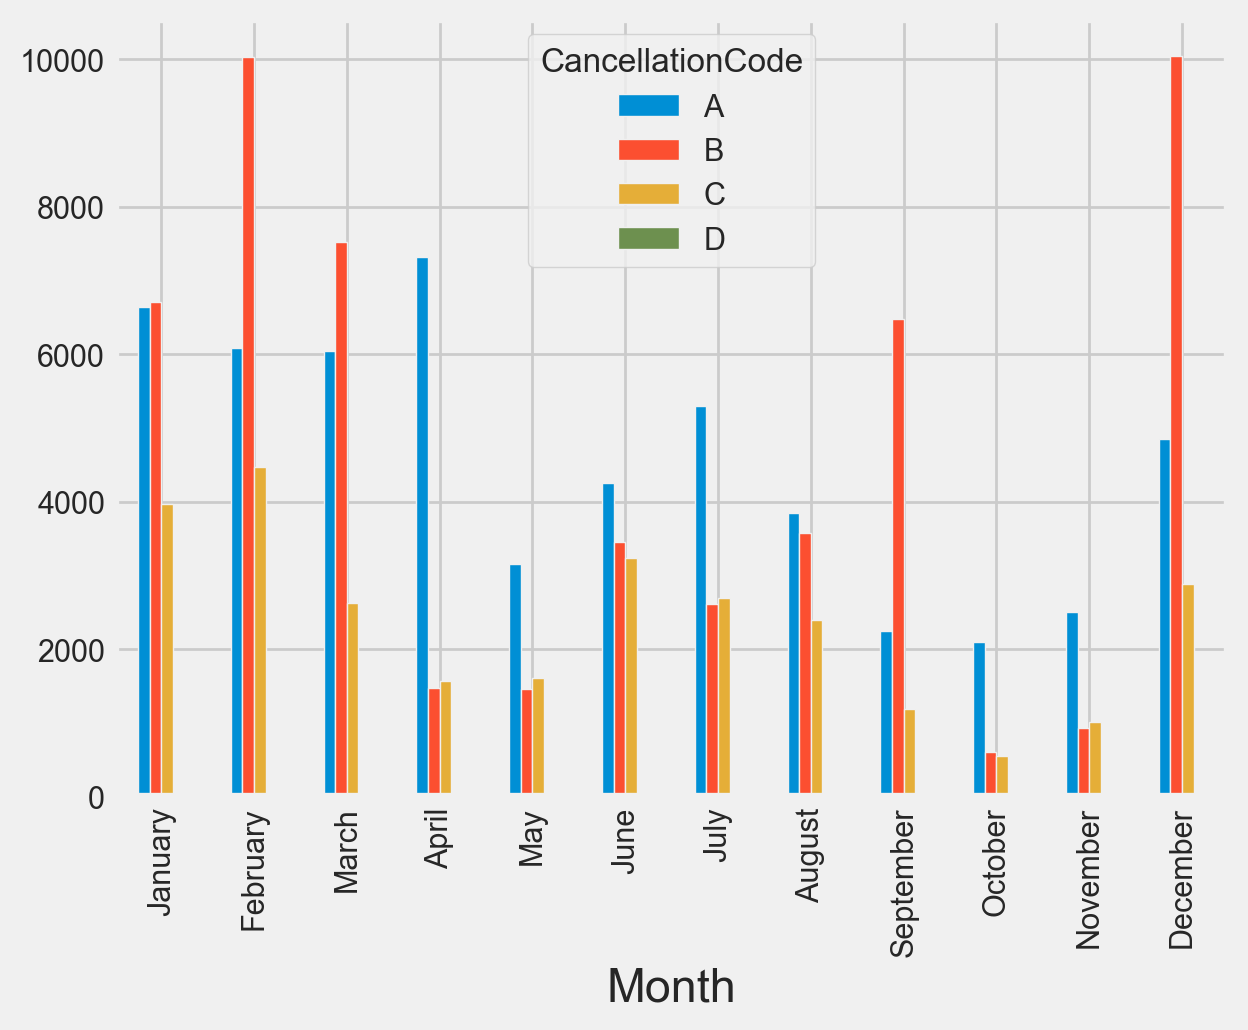

In [127]:
# ЮРИЙ
# create a month name list
import calendar

month_names = []

for month_idx in flights_df["Month"].unique():
    month_names.append(calendar.month_name[month_idx])

ax = flights_df.groupby(["Month", "CancellationCode"]).size().unstack().plot(kind="bar")

ax.set_xticklabels(month_names, rotation=90)
plt.show()

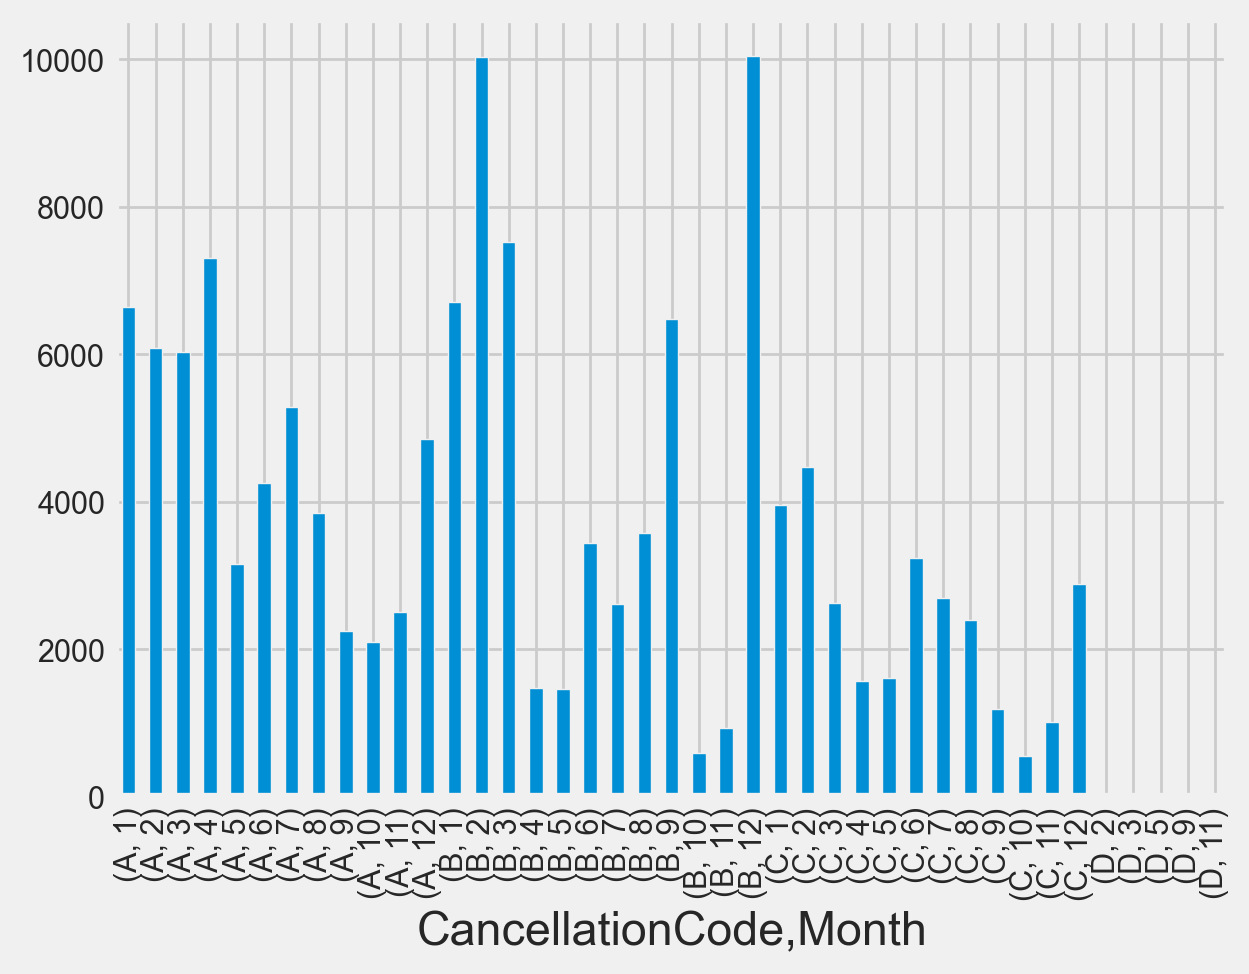

In [137]:
flights_df.head(10000000).groupby(["CancellationCode", 'Month']).size().plot(kind="bar");

In [111]:
canc_df = flights_df.dropna(subset=['CancellationCode']).head(1000000)
canc_df.head(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,...,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date,DepHour,Route
178,2008,1,3,4,NaN,WN,126,NaN,NaN,LAS,...,1,A,NaN,NaN,NaN,NaN,NaN,2008-01-03,NaN,LAS->OAK
373,2008,1,3,4,NaN,WN,1146,NaN,NaN,LAX,...,1,A,NaN,NaN,NaN,NaN,NaN,2008-01-03,NaN,LAX->OAK


<Axes: xlabel='Month'>

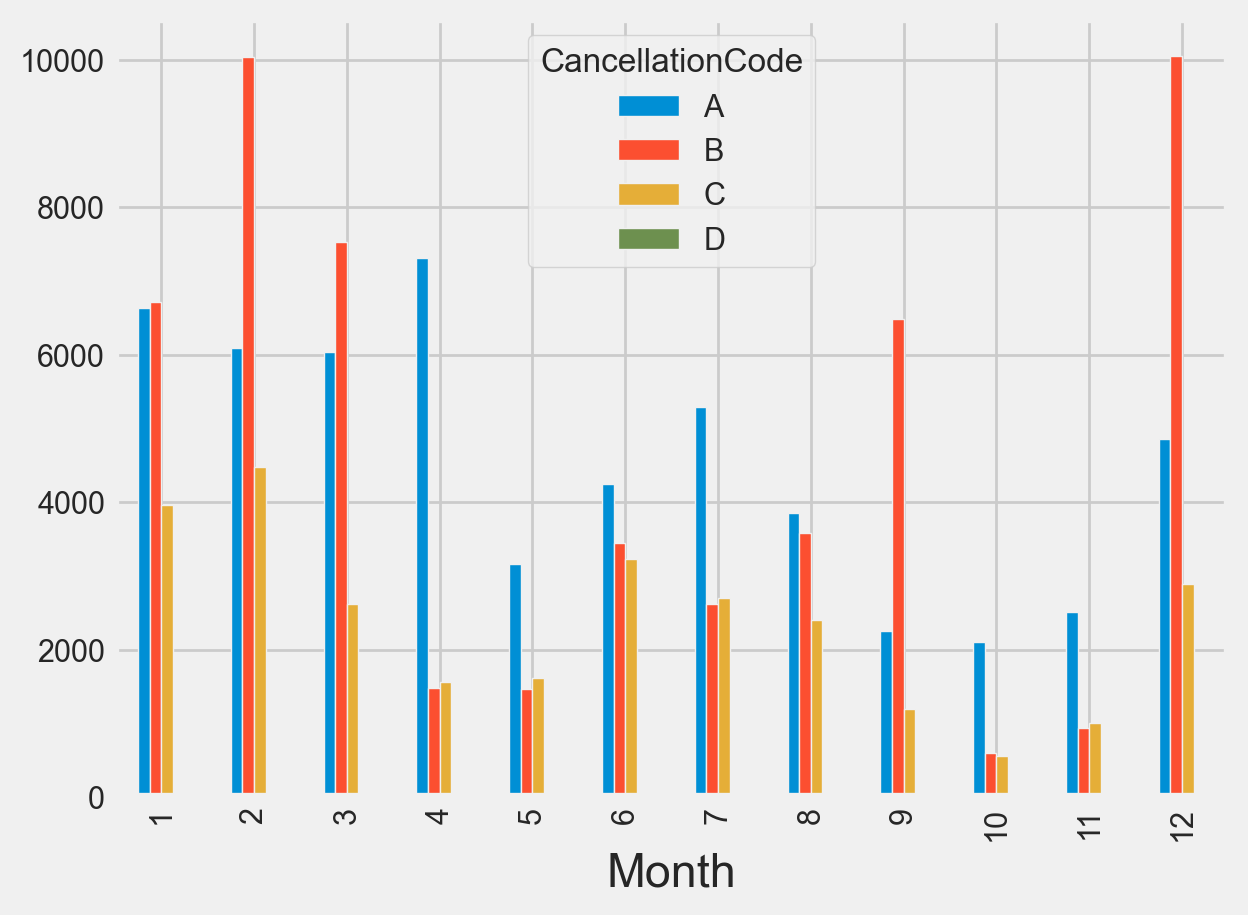

In [133]:
canc_df.groupby(['Month', 'CancellationCode']).size().unstack().plot(kind='bar')

<Axes: ylabel='Month'>

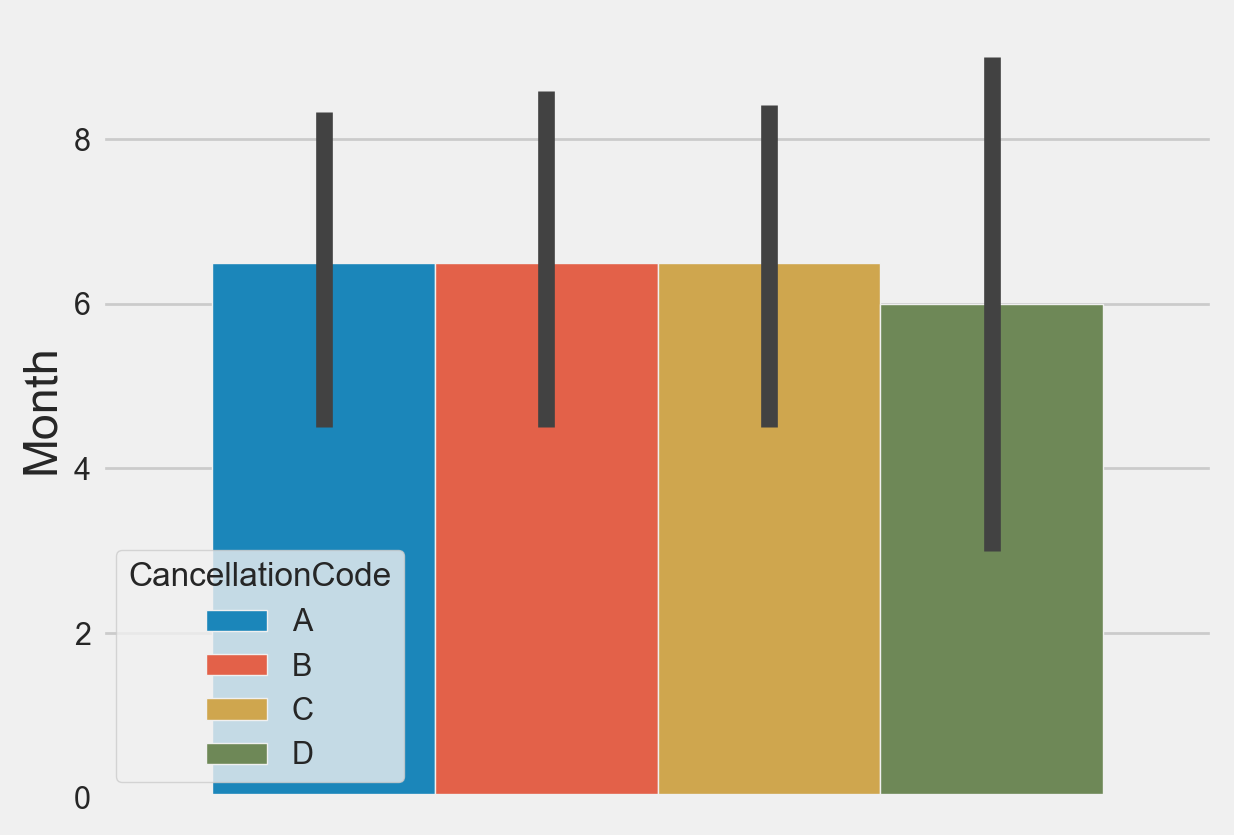

In [123]:
sns.barplot(data=canc_df.groupby(['Month', 'CancellationCode']).size().to_frame(), y='Month', hue='CancellationCode')

<Axes: ylabel='Month'>

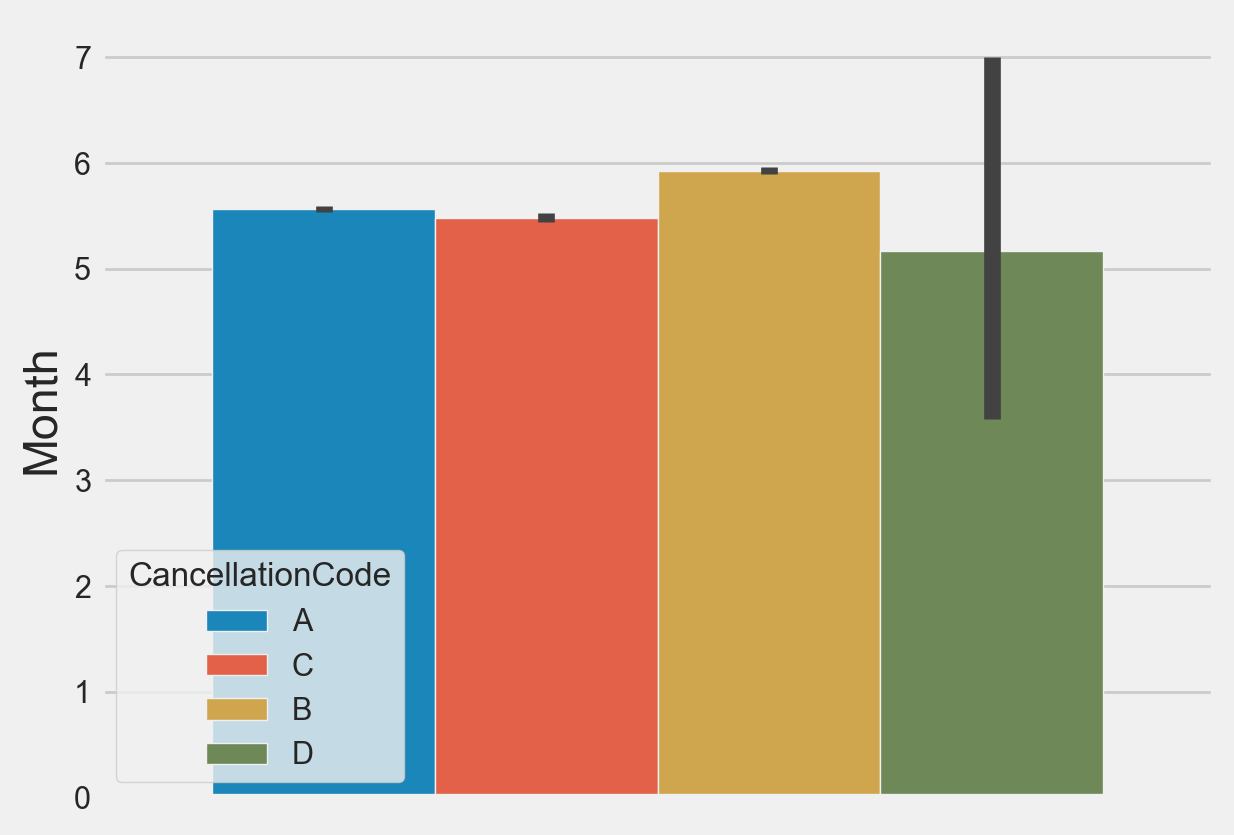

In [131]:
sns.barplot(data=flights_df, y='Month', hue='CancellationCode')

*Reminder on Cancellatoin codes:*
```
A - Carrier 
B - Weather 
C - National Air System 
D - Security
```

**<font color='red'>Question 18.</font> Which month Carrier?** 
- May
- January
- September
- April

<Axes: xlabel='Month'>

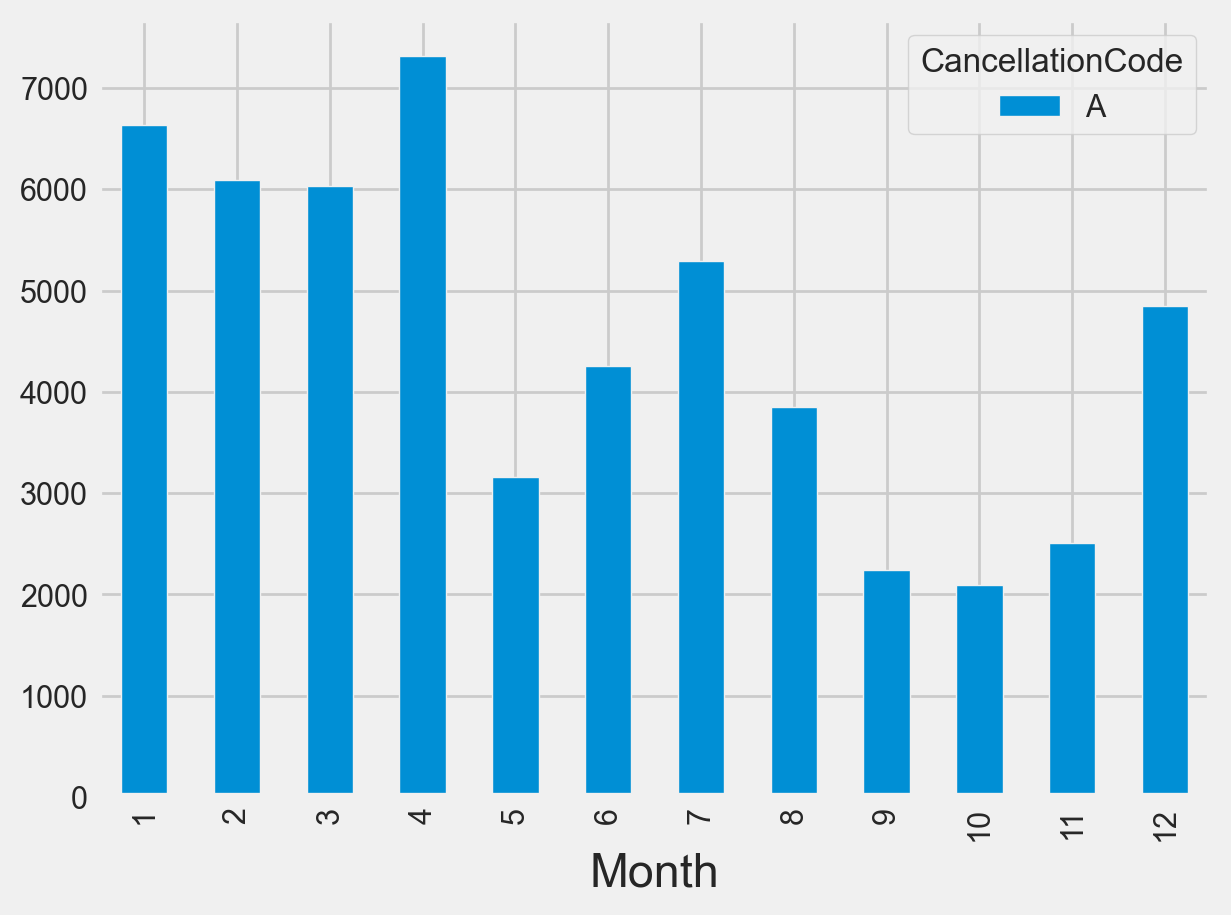

In [138]:
flights_df[flights_df['CancellationCode'] == 'A'].groupby(['Month', 'CancellationCode']).size().unstack().plot(kind='bar')

In [140]:
flights_df.head().T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,2003.0,754.0,628.0,926.0,1829.0
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920
ArrDelay,-14.0,2.0,14.0,-6.0,34.0
DepDelay,8.0,19.0,8.0,-4.0,34.0
Origin,IAD,IAD,IND,IND,IND


**<font color='red'>Question 19.</font> Identify question.**

- 9E
- EV
- HA
- AA

In [149]:
flights_df[(flights_df['Month'] == 4) & (flights_df['CancellationCode'] == 'A')].groupby('UniqueCarrier').size().sort_values(ascending=False).head(2)

UniqueCarrier
AA    3696
WN     533
dtype: int64

**<font color='red'>Question 20.</font> Examine median  percentile).**

- EV
- OO
- AA
- AQ 

AQ	9.0	10.0  
HA	8.0	11.0

In [158]:
pos_del = flights_df[(flights_df['ArrDelay'] > 0) & (flights_df['DepDelay'] > 0)]
pos_del.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2049000 entries, 1 to 7009726
Data columns (total 22 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Year               uint16        
 1   Month              uint8         
 2   DayofMonth         uint8         
 3   DayOfWeek          uint8         
 4   DepTime            float32       
 5   UniqueCarrier      object        
 6   FlightNum          uint16        
 7   ArrDelay           float32       
 8   DepDelay           float32       
 9   Origin             object        
 10  Dest               object        
 11  Distance           uint16        
 12  Cancelled          uint8         
 13  CancellationCode   object        
 14  CarrierDelay       float32       
 15  WeatherDelay       float32       
 16  NASDelay           float32       
 17  SecurityDelay      float32       
 18  LateAircraftDelay  float32       
 19  Date               datetime64[ns]
 20  DepHour            float32   

In [180]:
no_outliers = pos_del[(pos_del.DepDelay < pos_del.DepDelay.quantile(0.95)) & (pos_del.ArrDelay < pos_del.ArrDelay.quantile(0.95))]
no_outliers

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,...,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date,DepHour,Route
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03,7.0,IAD->TPA
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03,6.0,IND->BWI
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,...,0,NaN,2.0,0.0,0.0,0.0,32.0,2008-01-03,18.0,IND->BWI
5,2008,1,3,4,1940.0,WN,378,11.0,25.0,IND,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03,19.0,IND->JAX
6,2008,1,3,4,1937.0,WN,509,57.0,67.0,IND,...,0,NaN,10.0,0.0,0.0,0.0,47.0,2008-01-03,19.0,IND->LAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009710,2008,12,13,6,1250.0,DL,1621,25.0,30.0,MSP,...,0,NaN,3.0,0.0,0.0,0.0,22.0,2008-12-13,12.0,MSP->ATL
7009717,2008,12,13,6,657.0,DL,1631,75.0,57.0,RIC,...,0,NaN,0.0,57.0,18.0,0.0,0.0,2008-12-13,6.0,RIC->ATL
7009718,2008,12,13,6,1007.0,DL,1631,99.0,80.0,ATL,...,0,NaN,1.0,0.0,19.0,0.0,79.0,2008-12-13,10.0,ATL->IAH
7009723,2008,12,13,6,1002.0,DL,1636,14.0,3.0,ATL,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-12-13,10.0,ATL->IAD


In [ ]:
sns.boxplot(data=no_outliers, x='UniqueCarrier', )
# .groupby('UniqueCarrier')

In [ ]:
# no_outliers.head(1000).groupby(['UniqueCarrier']).size().plot()

In [ ]:
flights_df.groupby(["UniqueCarrier", "FlightNum"]).agg(
    {"Distance": [np.mean, np.sum, "count"], "Cancelled": np.sum}
).sort_values(("Distance", "sum"), ascending=False).iloc[0:3]

In [179]:
no_outliers.groupby(["UniqueCarrier"]).agg(
    {"DepDelay": 'median', "ArrDelay": 'median'}
).sort_values('ArrDelay', ascending=True).iloc[0:3]

,DepDelay,ArrDelay
UniqueCarrier,,
AQ,9.0,10.0
HA,8.0,11.0
WN,18.0,15.0


In [164]:
flights_df.head(2).T

,0,1
Year,2008,2008
Month,1,1
DayofMonth,3,3
DayOfWeek,4,4
DepTime,2003.0,754.0
UniqueCarrier,WN,WN
FlightNum,335,3231
ArrDelay,-14.0,2.0
DepDelay,8.0,19.0
Origin,IAD,IAD


In [ ]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

<Axes: xlabel='UniqueCarrier', ylabel='ArrDelay'>

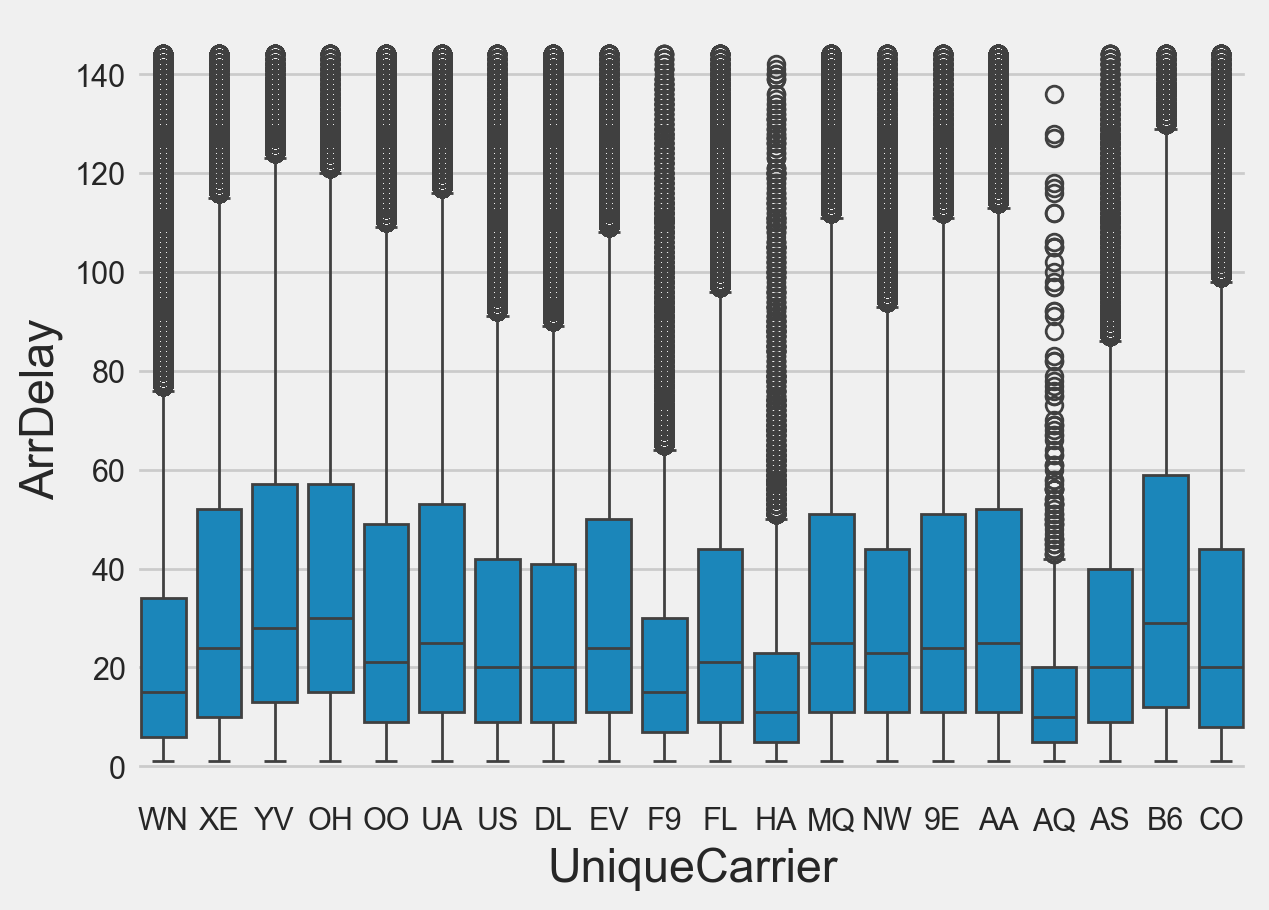

In [183]:
sns.boxplot(x='UniqueCarrier', y='ArrDelay', data=no_outliers)

<Axes: xlabel='UniqueCarrier', ylabel='DepDelay'>

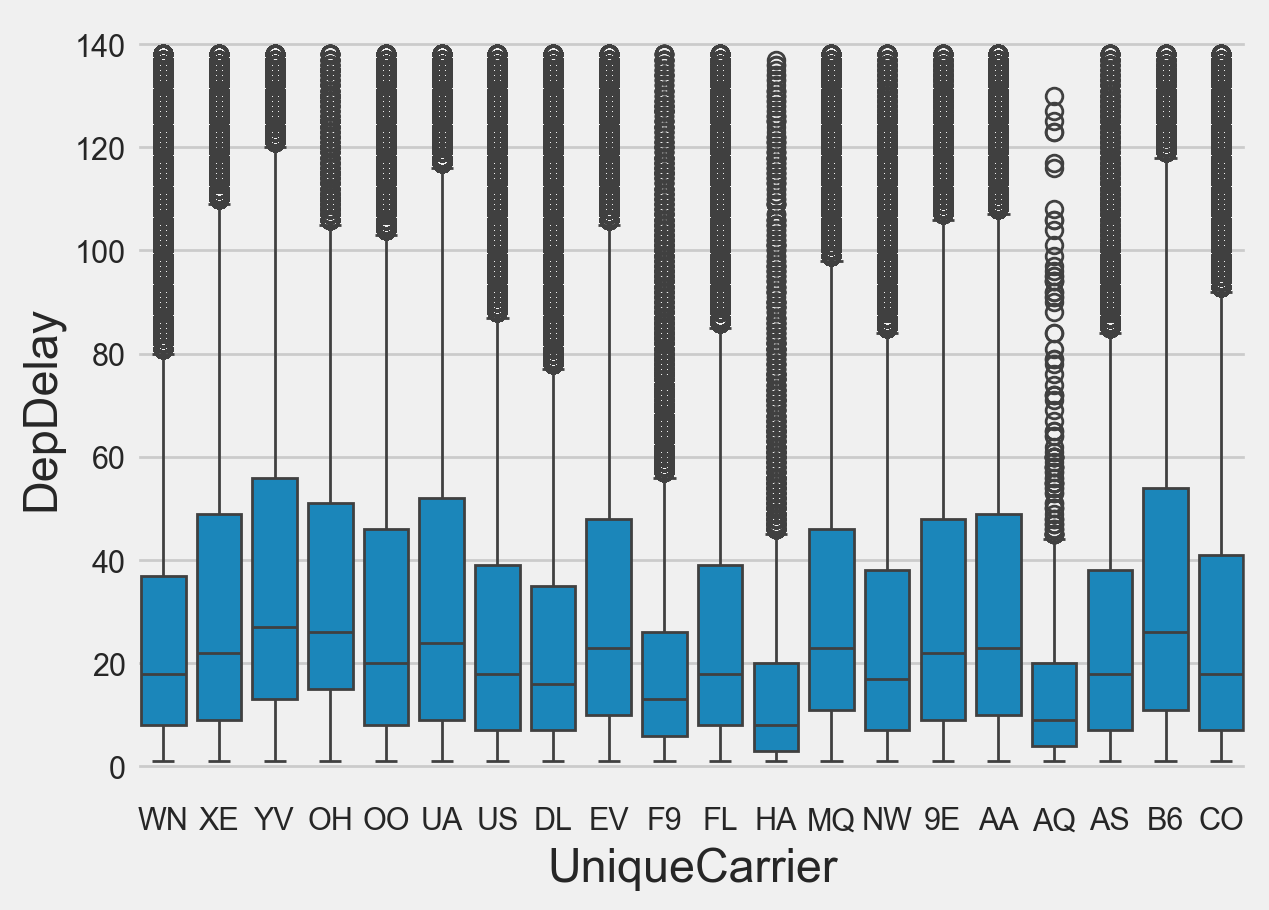

In [192]:
sns.boxplot(x='UniqueCarrier', y='DepDelay', data=no_outliers)
# .head(10000)
# , 'DepDelay', 'ArrDelay'

In [ ]:
sns.boxplot(x='UniqueCarrier', y='DepDelay', hue='DepDelay', data=no_outliers)


In [194]:
sns.load_dataset("penguins")


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [206]:
flights_df[flights_df.DepDelay == flights_df.DepDelay.max()]['Dest']

2235378    MSP
Name: Dest, dtype: object

In [207]:
flights_df[flights_df.ArrDelay == flights_df.ArrDelay.max()]['Dest']

1018798    MSP
Name: Dest, dtype: object

In [217]:
flights_df[flights_df['Cancelled'] == 1].groupby(['UniqueCarrier']).size().sort_values(ascending=False).head(2)

UniqueCarrier
MQ    18331
AA    17440
dtype: int64

In [279]:
flights_df[flights_df['Cancelled'] == 1].head(2).T

,178,373
Year,2008,2008
Month,1,1
DayofMonth,3,3
DayOfWeek,4,4
DepTime,NaN,NaN
UniqueCarrier,WN,WN
FlightNum,126,1146
ArrDelay,NaN,NaN
DepDelay,NaN,NaN
Origin,LAS,LAX


In [223]:
flights_df.groupby(['DepHour']).size().sort_values(ascending=False).head(2)

DepHour
8.0    449224
6.0    446737
dtype: int64

хочу вывести список количества отменнёных полётов,сгруппированый по часам  
но у меня не получается потому, что у отменнёных полётов нет информацию по времени, только по дате

In [294]:
flights_df.groupby(['DepHour', 'Cancelled']).size().sort_index().head(27)

DepHour  Cancelled
0.0      0             20361
         1                 7
1.0      0              5857
         1                 4
2.0      0              1850
         1                 1
3.0      0               833
4.0      0              3389
         1                 1
5.0      0            148143
         1                24
6.0      0            446657
         1                80
7.0      0            436617
         1                83
8.0      0            449145
         1                79
9.0      0            434794
         1                56
10.0     0            431403
         1                57
11.0     0            444643
         1                59
12.0     0            424196
         1                53
13.0     0            435870
         1                47
dtype: int64

In [288]:
flights_df.groupby("DepHour")["Cancelled"].mean().sort_values().head()

DepHour
3.0     0.000000
13.0    0.000108
12.0    0.000125
9.0     0.000129
10.0    0.000132
Name: Cancelled, dtype: float64

In [300]:
set(flights_df.DepHour.unique()).difference(flights_df[flights_df['Cancelled'] == 1]['DepHour'])

{nan, 3.0}

In [303]:
flights_df[flights_df['DepHour'] == 'nan']

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,...,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date,DepHour,Route
